
# <span style="font-size: 20pt; font-weight: bold; color: #0098cd">MOVIE ANALYSIS</span>

---

### Una plataforma de streaming para el hogar, con presencia en todo el mundo, necesita impulsar su rendimiento utilizando datos de tendencias en el sector de manera estratégica. Como científico de datos especializado en la industria del entretenimiento, has sido convocado para analizar estos datos y ofrecer insights que guíen sus decisiones y respondan a las siguientes preguntas clave:


---

### **Preguntas**

1. ¿Cual es la evolución del rating por tipo de contenido?

2. ¿Cual es el rating promedio por género?

3. ¿Cuáles son los géneros que proporcionan mayor ROI?

4. ¿Cuáles son los países con mayor producción de contenido?

5. ¿Cual es tu recomendación para el cliente?

---

# 1. CONFIGURACIÓN DEL AMBIENTE

In [1]:
import warnings
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:.2f}'.format)
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import dask.dataframe as dd
import os
from google.colab import files
# from google.colab import drive
# drive.mount('/content/drive')
global df_title_basics,df_title_ratings,df_tmdb

# 2. OBTENCIÓN, TRATAMIENTO Y ANÁLISIS EXPLORATORIO DE DATOS (EDA)

## 2.1 CARGANDO LAS BASES DE DATOS

In [2]:
# Sube el archivo kaggle.json - API de página de Kaggle
uploaded = files.upload()

# # Crea el directorio .kaggle y mueve el archivo kaggle.json allí
# !mkdir -p ~/.kaggle
# !cp kaggle.json ~/.kaggle/

# # Establece los permisos adecuados para el archivo kaggle.json
# !chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json


In [3]:
## Copiando el API command del dataset de Kaggle
!kaggle datasets download -d asaniczka/tmdb-movies-dataset-2023-930k-movies
!kaggle datasets download -d ashirwadsangwan/imdb-dataset

# Descomprime el archivo descargado si es necesario
# !unzip dataset-name.zip
!unzip imdb-dataset.zip
!unzip tmdb-movies-dataset-2023-930k-movies.zip

Dataset URL: https://www.kaggle.com/datasets/asaniczka/tmdb-movies-dataset-2023-930k-movies
License(s): ODC Attribution License (ODC-By)
 98% 191M/194M [00:13<00:00, 20.7MB/s]
100% 194M/194M [00:13<00:00, 14.9MB/s]
Dataset URL: https://www.kaggle.com/datasets/ashirwadsangwan/imdb-dataset
License(s): other
100% 1.45G/1.45G [01:27<00:00, 19.8MB/s]
100% 1.45G/1.45G [01:27<00:00, 17.8MB/s]
Archive:  imdb-dataset.zip
  inflating: name.basics.tsv         
  inflating: title.akas.tsv          
  inflating: title.basics.tsv        
  inflating: title.principals.tsv    
  inflating: title.ratings.tsv       
Archive:  tmdb-movies-dataset-2023-930k-movies.zip
  inflating: TMDB_movie_dataset_v11.csv  


In [ ]:
## Por si falla el Link de Kaggle, lo tengo cargado en mi dataset de kaggle
!kaggle datasets download -d zerberus10288/tmdb-movie-dataset
!unzip tmdb-movie-dataset.zip
!rm tmdb-movie-dataset.zip

Archive:  tmdb-movie-dataset.zip
  inflating: TMDB_movie_dataset_v11.csv  


In [4]:
## De ser necesario, eliminar los archivos zippeados
!rm imdb-dataset.zip
!rm tmdb-movies-dataset-2023-930k-movies.zip

 **NOTA:**

 > Dask is lazily evaluated. The result from a computation isn’t computed until you ask for it. Instead, a Dask task graph for the computation is produced.

 > Anytime you have a Dask object and you want to get the result, call compute

In [5]:
df_title_basics = dd.read_csv(r'/content/title.basics.tsv', dtype={'isAdult': 'object', 'runtimeMinutes': 'object', 'startYear': 'object'}, delimiter='\t', low_memory=False)
df_title_basics.head(10)

tconst titleType                                 primaryTitle  \
0  tt0000001     short                                   Carmencita   
1  tt0000002     short                       Le clown et ses chiens   
2  tt0000003     short                               Pauvre Pierrot   
3  tt0000004     short                                  Un bon bock   
4  tt0000005     short                             Blacksmith Scene   
5  tt0000006     short                            Chinese Opium Den   
6  tt0000007     short  Corbett and Courtney Before the Kinetograph   
7  tt0000008     short       Edison Kinetoscopic Record of a Sneeze   
8  tt0000009     movie                                   Miss Jerry   
9  tt0000010     short                          Leaving the Factory   

                                 originalTitle isAdult startYear endYear  \
0                                   Carmencita       0      1894      \N   
1                       Le clown et ses chiens       0      1892      \N   
2                               Pauvre Pierrot       0      1892      \N   
3                                  Un bon bock       0      1892      \N   
4                             Blacksmith Scene       0      1893      \N   
5                            Chinese Opium Den       0      1894      \N   
6  Corbett and Courtney Before the Kinetograph       0      1894      \N   
7       Edison Kinetoscopic Record of a Sneeze       0      1894      \N   
8                                   Miss Jerry       0      1894      \N   
9          La sortie de l'usine Lumière à Lyon       0      1895      \N   

  runtimeMinutes                    genres  
0              1         Documentary,Short  
1              5           Animation,Short  
2              5  Animation,Comedy,Romance  
3             12           Animation,Short  
4              1              Comedy,Short  
5              1                     Short  
6              1               Short,Sport  
7              1         Documentary,Short  
8             45                   Romance  
9              1         Documentary,Short

In [ ]:
## Validando para un identificador 'tt10872600'
df_title_basics[df_title_basics.tconst == "tt10872600"].compute()

tconst titleType             primaryTitle  \
643954  tt10872600     movie  Spider-Man: No Way Home   

                  originalTitle isAdult startYear endYear runtimeMinutes  \
643954  Spider-Man: No Way Home       0      2021      \N            148   

                          genres  
643954  Action,Adventure,Fantasy

In [6]:
df_title_ratings = dd.read_csv(r'/content/title.ratings.tsv', delimiter='\t', low_memory=False)
df_title_ratings.head(10)

tconst  averageRating  numVotes
0  tt0000001           5.70      2058
1  tt0000002           5.60       277
2  tt0000003           6.50      2026
3  tt0000004           5.40       179
4  tt0000005           6.20      2793
5  tt0000006           5.10       188
6  tt0000007           5.40       875
7  tt0000008           5.40      2205
8  tt0000009           5.40       211
9  tt0000010           6.80      7608

In [ ]:
## Validando para el mismo identificador 'tt10872600'
df_title_ratings[df_title_ratings.tconst == "tt10872600"].compute()

tconst  averageRating  numVotes
510532  tt10872600           8.20    888144

In [7]:
df_tmdb = dd.read_csv(r'/content/TMDB_movie_dataset_v11.csv', low_memory=False)
df_tmdb.head()

id            title  vote_average  vote_count    status release_date  \
0   27205        Inception          8.36       34495  Released   2010-07-15   
1  157336     Interstellar          8.42       32571  Released   2014-11-05   
2     155  The Dark Knight          8.51       30619  Released   2008-07-16   
3   19995           Avatar          7.57       29815  Released   2009-12-15   
4   24428     The Avengers          7.71       29166  Released   2012-04-25   

      revenue  runtime  adult                     backdrop_path     budget  \
0   825532764      148  False  /8ZTVqvKDQ8emSGUEMjsS4yHAwrp.jpg  160000000   
1   701729206      169  False  /pbrkL804c8yAv3zBZR4QPEafpAR.jpg  165000000   
2  1004558444      152  False  /nMKdUUepR0i5zn0y1T4CsSB5chy.jpg  185000000   
3  2923706026      162  False  /vL5LR6WdxWPjLPFRLe133jXWsh5.jpg  237000000   
4  1518815515      143  False  /9BBTo63ANSmhC4e6r62OJFuK2GL.jpg  220000000   

                                         homepage    imdb_id  \
0     https://www.warnerbros.com/movies/inception  tt1375666   
1               http://www.interstellarmovie.net/  tt0816692   
2  https://www.warnerbros.com/movies/dark-knight/  tt0468569   
3            https://www.avatar.com/movies/avatar  tt0499549   
4      https://www.marvel.com/movies/the-avengers  tt0848228   

  original_language   original_title  \
0                en        Inception   
1                en     Interstellar   
2                en  The Dark Knight   
3                en           Avatar   
4                en     The Avengers   

                                            overview  popularity  \
0  Cobb, a skilled thief who commits corporate es...       83.95   
1  The adventures of a group of explorers who mak...      140.24   
2  Batman raises the stakes in his war on crime. ...      130.64   
3  In the 22nd century, a paraplegic Marine is di...       79.93   
4  When an unexpected enemy emerges and threatens...       98.08   

                        poster_path  \
0  /oYuLEt3zVCKq57qu2F8dT7NIa6f.jpg   
1  /gEU2QniE6E77NI6lCU6MxlNBvIx.jpg   
2  /qJ2tW6WMUDux911r6m7haRef0WH.jpg   
3  /kyeqWdyUXW608qlYkRqosgbbJyK.jpg   
4   /RYMX2wcKCBAr24UyPD7xwmjaTn.jpg   

                                             tagline  \
0               Your mind is the scene of the crime.   
1  Mankind was born on Earth. It was never meant ...   
2                  Welcome to a world without rules.   
3                        Enter the world of Pandora.   
4                            Some assembly required.   

                                        genres  \
0           Action, Science Fiction, Adventure   
1            Adventure, Drama, Science Fiction   
2               Drama, Action, Crime, Thriller   
3  Action, Adventure, Fantasy, Science Fiction   
4           Science Fiction, Action, Adventure   

                                production_companies  \
0  Legendary Pictures, Syncopy, Warner Bros. Pict...   
1  Legendary Pictures, Syncopy, Lynda Obst Produc...   
2  DC Comics, Legendary Pictures, Syncopy, Isobel...   
3  Dune Entertainment, Lightstorm Entertainment, ...   
4                                     Marvel Studios   

                       production_countries  \
0  United Kingdom, United States of America   
1  United Kingdom, United States of America   
2  United Kingdom, United States of America   
3  United States of America, United Kingdom   
4                  United States of America   

                     spoken_languages  \
0  English, French, Japanese, Swahili   
1                             English   
2                   English, Mandarin   
3                    English, Spanish   
4             English, Hindi, Russian   

                                            keywords  
0  rescue, mission, dream, airplane, paris, franc...  
1  rescue, future, spacecraft, race against time,...  
2  joker, sadism, chaos, secret identity, crime f...  
3  future, society, culture clash, space travel, ...  
4  new york c

In [ ]:
## Validando para el mismo identificador 'tt10872600'
df_tmdb[df_tmdb.imdb_id == "tt10872600"].compute()

id                    title  vote_average  vote_count    status  \
57  634649  Spider-Man: No Way Home          7.99       18299  Released   

   release_date     revenue  runtime  adult                     backdrop_path  \
57   2021-12-15  1921847111      148  False  /14QbnygCuTO0vl7CAFmPf1fgZfV.jpg   

       budget                              homepage     imdb_id  \
57  200000000  https://www.spidermannowayhome.movie  tt10872600   

   original_language           original_title  \
57                en  Spider-Man: No Way Home   

                                             overview  popularity  \
57  Peter Parker is unmasked and no longer able to...      186.06   

                         poster_path                    tagline  \
57  /5weKu49pzJCt06OPpjvT80efnQj.jpg  The Multiverse unleashed.   

                                genres  \
57  Action, Adventure, Science Fiction   

                                 production_companies  \
57  Marvel Studios, Pascal Pictures, Columbia Pict...   

        production_countries  spoken_languages  \
57  United States of America  English, Tagalog   

                                             keywords  
57  new york city, hero, showdown, magic, loss of ...

**OBSERVACIÓN:**
* Podemos observar que para el mismo identificador, encontramos valores en las tres tablas a analizar. Por consiguiente nos guiaremos de los identificadores **'tconst'**, para realizar nuestras consultas en las tres tablas.

## 2.2 TRATAMIENTO DE DATOS

### 2.2.1 Tabla 'df_title_basics'

In [8]:
df_title_basics.info()

<class 'dask.dataframe.core.DataFrame'>
Columns: 9 entries, tconst to genres
dtypes: string(9)

In [9]:
## Verificando la cantidad de filas que tenemos en el dataset
df_title_basics.shape[0].compute()

10880693

Obs:
* Notamos que tenemos 9 columnas y 10 880 693 filas.
* Tener en cuenta que nuestro dataset se actualiza diariamente, el valor de las filas puede variar en cada corrida.


In [10]:
## Verificando la cantidad  de valores por categoría
df_title_basics.titleType.value_counts(normalize=True).compute()

titleType
tvEpisode      0.77
short          0.09
movie          0.06
video          0.03
tvSeries       0.02
tvMovie        0.01
tvMiniSeries   0.01
tvSpecial      0.00
videoGame      0.00
tvShort        0.00
tvPilot        0.00
Name: proportion, dtype: double[pyarrow]

* Observamos que la predominancia de los tipos de formatos en el streaming es de los tvEpisode, sin embargo, consideramos que los más importantes para nuestros análisis de rendimiento y recomendación para la plataforma de streaming, son las categorías **'movie', 'short' y 'tvSeries'**. Lo demás no se considerará para nuestros análisis.

In [11]:
df_title_basics = df_title_basics[df_title_basics['titleType'].isin(['short','movie','tvSeries'])].compute()
df_title_basics.head(10)

tconst titleType                                 primaryTitle  \
0  tt0000001     short                                   Carmencita   
1  tt0000002     short                       Le clown et ses chiens   
2  tt0000003     short                               Pauvre Pierrot   
3  tt0000004     short                                  Un bon bock   
4  tt0000005     short                             Blacksmith Scene   
5  tt0000006     short                            Chinese Opium Den   
6  tt0000007     short  Corbett and Courtney Before the Kinetograph   
7  tt0000008     short       Edison Kinetoscopic Record of a Sneeze   
8  tt0000009     movie                                   Miss Jerry   
9  tt0000010     short                          Leaving the Factory   

                                 originalTitle isAdult startYear endYear  \
0                                   Carmencita       0      1894      \N   
1                       Le clown et ses chiens       0      1892      \N   
2                               Pauvre Pierrot       0      1892      \N   
3                                  Un bon bock       0      1892      \N   
4                             Blacksmith Scene       0      1893      \N   
5                            Chinese Opium Den       0      1894      \N   
6  Corbett and Courtney Before the Kinetograph       0      1894      \N   
7       Edison Kinetoscopic Record of a Sneeze       0      1894      \N   
8                                   Miss Jerry       0      1894      \N   
9          La sortie de l'usine Lumière à Lyon       0      1895      \N   

  runtimeMinutes                    genres  
0              1         Documentary,Short  
1              5           Animation,Short  
2              5  Animation,Comedy,Romance  
3             12           Animation,Short  
4              1              Comedy,Short  
5              1                     Short  
6              1               Short,Sport  
7              1         Documentary,Short  
8             45                   Romance  
9              1         Documentary,Short

In [12]:
df_title_basics['titleType'].value_counts()

titleType
short       1001698
movie        684498
tvSeries     265638
Name: count, dtype: int64[pyarrow]

In [13]:
##Verificando valores nulos en nuestro dataframe
df_title_basics.isnull().sum()

tconst            0
titleType         0
primaryTitle      5
originalTitle     5
isAdult           0
startYear         0
endYear           0
runtimeMinutes    0
genres            0
dtype: int64

* Notamos que para la cantidad de datos que poseemos, tenemos muy pocos valores nulos en nuestro dataframe.
* Tener en cuenta que en nuestra información del dataframe en Kaggle, nos indica que los datos que sean /N o //N, serán considerados como datos nulos. Entonces procederemos a realizar esa modificación.

In [14]:
## Reemplazando los valores /N o \\N por np.nan, de todo el dataframe
for i in df_title_basics.columns:
   df_title_basics[i] = df_title_basics[i].replace('/N', np.nan).replace('\\N', np.nan)

##Verificando nuevamente valores nulos en nuestro dataframe
df_title_basics.isnull().sum()

tconst                  0
titleType               0
primaryTitle            5
originalTitle           5
isAdult                 0
startYear          158386
endYear           1854765
runtimeMinutes     775963
genres              96482
dtype: int64

* Luego de analizar los valores nulos en nuestro dataframe, notamos que existen una cantidad grande de estos para la variable **'endYear'**. Como vemos que ocupa casi todo nuestro dataset, si eliminamos respecto a esta variable, nos quedariamos sin registros y considerando que tenemos datos de **'startYear'**, decidimos eliminar la variable **'endYear'**.

* De esta manera, decidimos elimnar el resto de variables **NaN**, para todas las demás variables.


In [15]:
## Eliminando columna 'endYear'
df_title_basics.drop(columns=['endYear','primaryTitle'], inplace=True)

# Eliminar filas con NaN
df_title_basics.dropna(inplace=True)

## Eliminando duplicados del dataframe
df_title_basics = df_title_basics.drop_duplicates()

# Verificando nuevamente si tenemos valores nulos
df_title_basics.isnull().sum()

tconst            0
titleType         0
originalTitle     0
isAdult           0
startYear         0
runtimeMinutes    0
genres            0
dtype: int64

In [16]:
## Validando cantidad de registros que tenemos
df_title_basics.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1130047 entries, 0 to 787181
Data columns (total 7 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   tconst          1130047 non-null  string
 1   titleType       1130047 non-null  string
 2   originalTitle   1130047 non-null  string
 3   isAdult         1130047 non-null  string
 4   startYear       1130047 non-null  string
 5   runtimeMinutes  1130047 non-null  string
 6   genres          1130047 non-null  string
dtypes: string(7)
memory usage: 94.8 MB


* Validamos que tenemos 1 130 049 filas y 7 columnas.
* No registramos valores nulos.
* Necesitamos modificar el tipo de datos para las variables 'isAdult', 'startYear' y 'runtimeMinutes'.

In [17]:
df_title_basics['isAdult'] = df_title_basics['isAdult'].astype('int')
df_title_basics['startYear'] = df_title_basics['startYear'].astype('int')
df_title_basics['runtimeMinutes'] = df_title_basics['runtimeMinutes'].astype('int')

df_title_basics.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1130047 entries, 0 to 787181
Data columns (total 7 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   tconst          1130047 non-null  string
 1   titleType       1130047 non-null  string
 2   originalTitle   1130047 non-null  string
 3   isAdult         1130047 non-null  int64 
 4   startYear       1130047 non-null  int64 
 5   runtimeMinutes  1130047 non-null  int64 
 6   genres          1130047 non-null  string
dtypes: int64(3), string(4)
memory usage: 100.0 MB


In [ ]:
## Guardando el dataset en un csv para trabajarlo posteriormente
# Guardar el DataFrame como un archivo CSV
df_title_basics.to_csv('df_title_basics.csv', index=False)

### 2.2.1 Tabla 'df_title_ratings'

In [18]:
df_title_ratings.info()

<class 'dask.dataframe.core.DataFrame'>
Columns: 3 entries, tconst to numVotes
dtypes: float64(1), int64(1), string(1)

In [19]:
df_title_ratings.head(10)

tconst  averageRating  numVotes
0  tt0000001           5.70      2058
1  tt0000002           5.60       277
2  tt0000003           6.50      2026
3  tt0000004           5.40       179
4  tt0000005           6.20      2793
5  tt0000006           5.10       188
6  tt0000007           5.40       875
7  tt0000008           5.40      2205
8  tt0000009           5.40       211
9  tt0000010           6.80      7608

In [20]:
df_title_ratings.isnull().sum().compute()

tconst           0
averageRating    0
numVotes         0
dtype: int64

In [21]:
df_title_ratings.shape[0].compute()

1450431

In [22]:
df_title_ratings.columns

Index(['tconst', 'averageRating', 'numVotes'], dtype='object')

In [23]:
## Reemplazando los valores /N o \\N por np.nan, de todo el dataframe
for i in df_title_ratings.columns:
   df_title_ratings[i] = df_title_ratings[i].replace('/N', np.nan).replace('\\N', np.nan)

df_title_ratings.isnull().sum().compute()

tconst           0
averageRating    0
numVotes         0
dtype: int64

* validamos que no hay presencia de datos nulos.
* Convertimos los tipos de datos a datos correctos para cada columna.

In [24]:
## Corrigiendo los tipos de datos de las columnas del dataframe
df_title_ratings['tconst'] = df_title_ratings['tconst'].astype('str')
df_title_ratings['averageRating'] = df_title_ratings['averageRating'].astype('float')
df_title_ratings['numVotes'] = df_title_ratings['numVotes'].astype('int')

## Transformando de dask dataframe a pandas dataframe
df_title_ratings = df_title_ratings.compute()

## Eliminando duplicados del dataframe
df_title_ratings = df_title_ratings.drop_duplicates()

In [25]:
df_title_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1450431 entries, 0 to 1450430
Data columns (total 3 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   tconst         1450431 non-null  string 
 1   averageRating  1450431 non-null  float64
 2   numVotes       1450431 non-null  int64  
dtypes: float64(1), int64(1), string(1)
memory usage: 40.4 MB


### 2.2.1 Tabla 'df_tmdb'

In [26]:
df_tmdb.info()

<class 'dask.dataframe.core.DataFrame'>
Columns: 24 entries, id to keywords
dtypes: bool(1), float64(2), int64(5), string(16)

In [27]:
df_tmdb.shape[0].compute()

1057850

In [28]:
## Considerando solo valores de 'revenue' y 'budget' mayores que cero
df_tmdb = df_tmdb[df_tmdb['revenue'] > 0]
df_tmdb = df_tmdb[df_tmdb['budget'] > 0]

## Creando la variable 'roi', que nos ayudará a evaluar
df_tmdb['roi'] = (df_tmdb['revenue'] - df_tmdb['budget']) / df_tmdb['budget']

## COnsiderando solo 'roi's mayores de cero, ya que necesitamos optimizar la plataforma
df_tmdb = df_tmdb[df_tmdb['roi']>0]

## Reemplazando los valores /N o \\N por np.nan, de todo el dataframe
for i in df_tmdb.columns:
   df_tmdb[i] = df_tmdb[i].replace('/N', np.nan).replace('\\N', np.nan)

df_tmdb.isnull().sum().compute()

id                         0
title                      0
vote_average               0
vote_count                 0
status                     0
release_date             752
revenue                    0
runtime                    0
adult                      0
backdrop_path           1544
budget                     0
homepage                5350
imdb_id                 1263
original_language          0
original_title             0
overview                 472
popularity                 0
poster_path              723
tagline                 1930
genres                   717
production_companies    1223
production_countries    1158
spoken_languages         996
keywords                1639
roi                        0
dtype: int64

In [29]:
df_tmdb.columns

Index(['id', 'title', 'vote_average', 'vote_count', 'status', 'release_date',
       'revenue', 'runtime', 'adult', 'backdrop_path', 'budget', 'homepage',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'tagline', 'genres',
       'production_companies', 'production_countries', 'spoken_languages',
       'keywords', 'roi'],
      dtype='object')

* Luego de analizar el dataframe, observamos que hay algunas columnas que no nos aportarían valor para nuestro análisis y tienen muchos valores nulos, por ende decidimos eliminar las siguientes columnas del dataframe: ['id','title','adult','backdrop_path','homepage','overview','poster_path','tagline','production_companies','spoken_languages','keywords'].
* Decidimos mantener algunas columnas, por más que tengan bastantes valores nulos, debido a que consideramos que podrían ser interesantes para nuestros análisis, como por ejemplo el país de producción o géneros, para nombrar algunos.

* La columna imdb_id, es muy importante ya que con esta haremos match con las otras tablas. Si bien tiene muchos valores nulos, estos tenemos que trabajarlos posteriormente.

In [30]:
columnas_eliminar = ['id','backdrop_path','homepage','overview','poster_path','tagline','production_companies','spoken_languages','keywords', 'title', 'adult', 'status']

In [31]:
## Convirtiendo el dataframde dask a pandas
df_tmdb = df_tmdb.compute()

## Eliminando las columnas no utilizaremos
df_tmdb.drop(columns=columnas_eliminar, inplace=True)

## Eliminando los valores nulos existentes
df_tmdb.dropna(inplace=True)

## Verificando nuevamente los valores nulos
df_tmdb.isnull().sum()

vote_average            0
vote_count              0
release_date            0
revenue                 0
runtime                 0
budget                  0
imdb_id                 0
original_language       0
original_title          0
popularity              0
genres                  0
production_countries    0
roi                     0
dtype: int64

In [32]:
## Eliminando valores duplicados en el dataframe
df_tmdb = df_tmdb.drop_duplicates()

## Corrigiendo los tipos de datos de las columnas del dataframe
df_tmdb['release_date'] = pd.to_datetime(df_tmdb['release_date'])

df_tmdb.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6609 entries, 0 to 161577
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   vote_average          6609 non-null   float64       
 1   vote_count            6609 non-null   int64         
 2   release_date          6609 non-null   datetime64[ns]
 3   revenue               6609 non-null   int64         
 4   runtime               6609 non-null   int64         
 5   budget                6609 non-null   int64         
 6   imdb_id               6609 non-null   string        
 7   original_language     6609 non-null   string        
 8   original_title        6609 non-null   string        
 9   popularity            6609 non-null   float64       
 10  genres                6609 non-null   string        
 11  production_countries  6609 non-null   string        
 12  roi                   6609 non-null   float64       
dtypes: datetime64[ns](1),

In [33]:
df_tmdb.head()

vote_average  vote_count release_date     revenue  runtime     budget  \
0          8.36       34495   2010-07-15   825532764      148  160000000   
1          8.42       32571   2014-11-05   701729206      169  165000000   
2          8.51       30619   2008-07-16  1004558444      152  185000000   
3          7.57       29815   2009-12-15  2923706026      162  237000000   
4          7.71       29166   2012-04-25  1518815515      143  220000000   

     imdb_id original_language   original_title  popularity  \
0  tt1375666                en        Inception       83.95   
1  tt0816692                en     Interstellar      140.24   
2  tt0468569                en  The Dark Knight      130.64   
3  tt0499549                en           Avatar       79.93   
4  tt0848228                en     The Avengers       98.08   

                                        genres  \
0           Action, Science Fiction, Adventure   
1            Adventure, Drama, Science Fiction   
2               Drama, Action, Crime, Thriller   
3  Action, Adventure, Fantasy, Science Fiction   
4           Science Fiction, Action, Adventure   

                       production_countries   roi  
0  United Kingdom, United States of America  4.16  
1  United Kingdom, United States of America  3.25  
2  United Kingdom, United States of America  4.43  
3  United States of America, United Kingdom 11.34  
4                  United States of America  5.90

## 2.3 ANÁLISIS EXPLORATORIO DE DATOS (EDA)

### 2.3.1 EDA - df_title_basics

In [34]:
df_title_basics.describe()

isAdult  startYear  runtimeMinutes
count 1130047.00 1130047.00      1130047.00
mean        0.01    2002.52           43.03
std         0.08      24.31          102.46
min         0.00    1874.00            0.00
25%         0.00    1999.00           10.00
50%         0.00    2012.00           23.00
75%         0.00    2017.00           79.00
max         1.00    2030.00        59460.00

In [35]:
df_title_basics['isAdult'].value_counts().reset_index()

isAdult    count
0        0  1122190
1        1     7857

<ipython-input-36-aab9c44da921>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  a = sns.barplot(x=df_title_basics['isAdult'].value_counts().reset_index()['isAdult'],


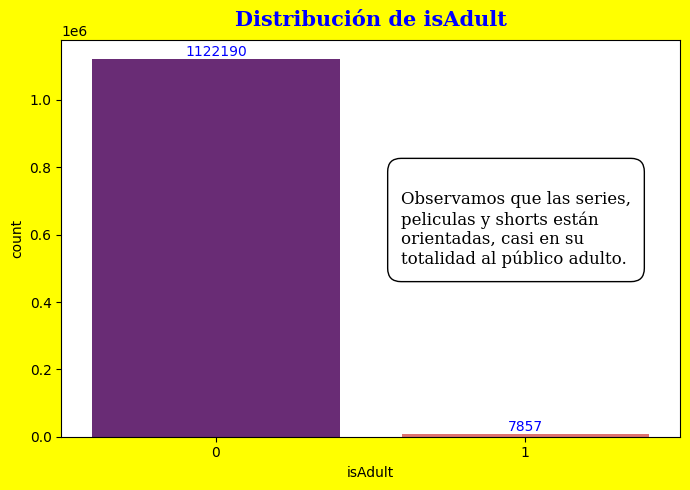

In [36]:
# Crear la figura
plt.figure(figsize=(7,5))
a = sns.barplot(x=df_title_basics['isAdult'].value_counts().reset_index()['isAdult'],
            y=df_title_basics['isAdult'].value_counts().reset_index()['count'], palette = 'magma')

# Añadir etiquetas de los valores encima de cada barra
for index, row in df_title_basics['isAdult'].value_counts().reset_index().iterrows():
    a.text(row.name, row['count']+ 8000, row['count'], color='blue', ha="center")

# Añadir texto de conclusión
conclusion_text = '''
Observamos que las series,
peliculas y shorts están
orientadas, casi en su
totalidad al público adulto.'''

plt.figtext(0.58, 0.55, conclusion_text, fontdict={'fontsize': 12, 'fontfamily':'serif', 'fontstyle':'normal', 'fontweight': 'normal', 'color': 'black'}, va='center', ha='left',
                     bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.8'))

# Establecer el color de fondo del gráfico
plt.gcf().set_facecolor('yellow')

plt.title('Distribución de isAdult', pad=10, fontdict={'fontsize': 15, 'fontfamily':'serif', 'fontstyle':'normal', 'fontweight': 'heavy', 'color': 'blue'})
plt.tight_layout()
plt.show()

<ipython-input-37-bfb39dab1286>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_title_basics['startYear'], orient='h', palette='viridis')
<ipython-input-37-bfb39dab1286>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_title_basics['runtimeMinutes'], orient='h', palette='viridis')


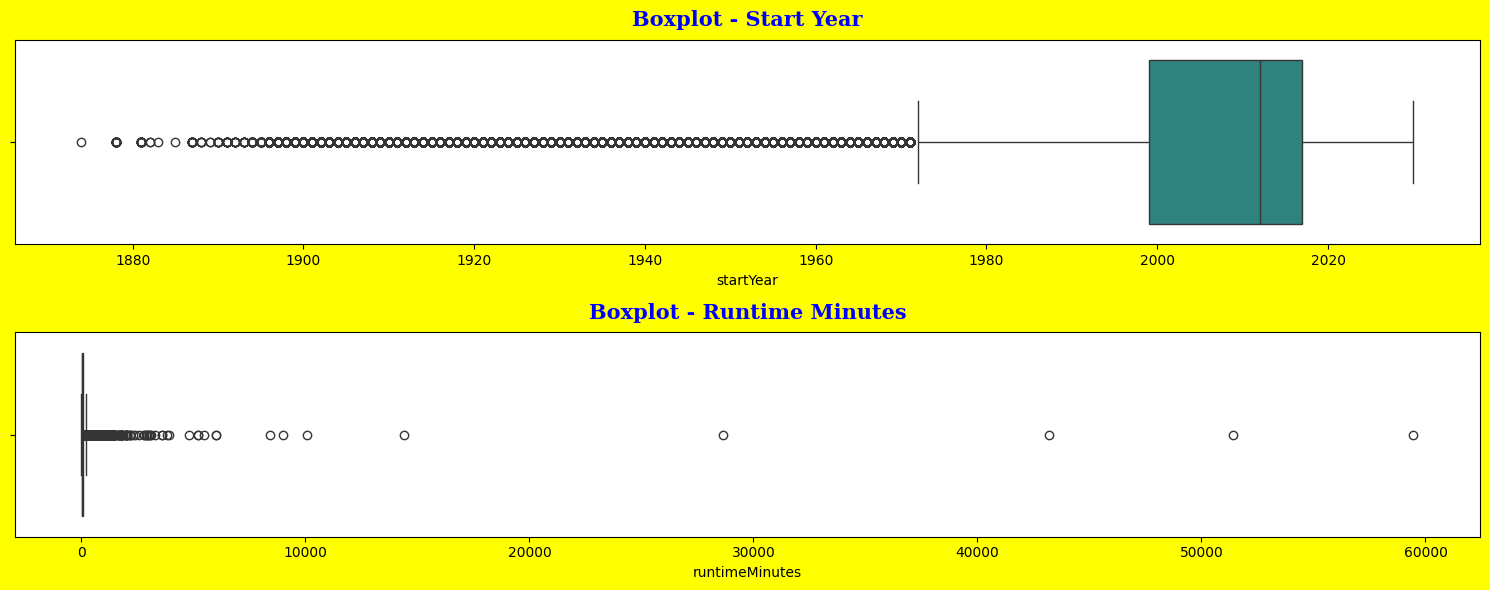

In [37]:
# Crear la figura y los subplots
plt.figure(figsize=(15, 6))

# Primer subplot: Boxplot de 'startYear'
plt.subplot(2, 1, 1)
sns.boxplot(x=df_title_basics['startYear'], orient='h', palette='viridis')
plt.title('Boxplot - Start Year', pad=10, fontdict={'fontsize': 15, 'fontfamily':'serif', 'fontstyle':'normal', 'fontweight': 'heavy', 'color': 'blue'})

# Segundo subplot: Boxplot de 'runtimeMinutes'
plt.subplot(2, 1, 2)
sns.boxplot(x=df_title_basics['runtimeMinutes'], orient='h', palette='viridis')
plt.title('Boxplot - Runtime Minutes', pad=10, fontdict={'fontsize': 15, 'fontfamily':'serif', 'fontstyle':'normal', 'fontweight': 'heavy', 'color': 'blue'})

# Establecer el color de fondo del gráfico
plt.gcf().set_facecolor('yellow')

# Mostrar la figura
plt.tight_layout()
plt.show()

* Notamos que hay contenido disponible en la plataforma de una cantidad de minutos demasiado grande, esto nos hace entender que hay contenido que puede durar varios días.

* Observamos que la mayoría del contenido tiene una fecha de inicio alrededor de los 2000 para arriba. Si bien tenemos años de inicio menores, la tendencia no es así.

<ipython-input-38-50e333dcc4cc>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  a = sns.barplot(x=df_title_basics['titleType'].value_counts().index, y = df_title_basics['titleType'].value_counts().values,


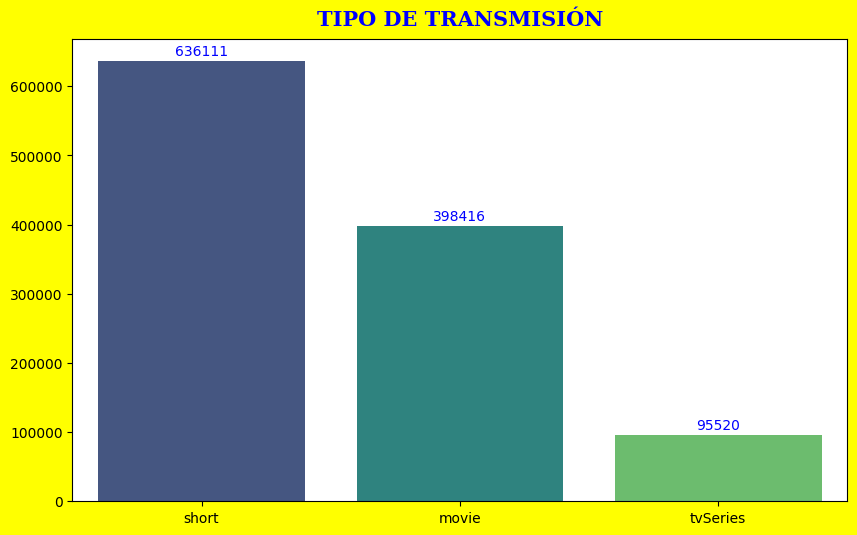

In [38]:
## Grafico de barras de los tipos de transacción
plt.figure(figsize=(10,6))
a = sns.barplot(x=df_title_basics['titleType'].value_counts().index, y = df_title_basics['titleType'].value_counts().values,
             palette='viridis')
plt.xlabel('')
plt.title('TIPO DE TRANSMISIÓN', pad=10, fontdict={'fontsize': 15, 'fontfamily':'serif', 'fontstyle':'normal', 'fontweight': 'heavy', 'color': 'blue'})
plt.grid(False)

# Añadir etiquetas de los valores encima de cada barra
for index, row in df_title_basics['titleType'].value_counts().reset_index().iterrows():
    a.text(row.name, row['count']+ 8000, row['count'], color='blue', ha="center")

# Establecer el color de fondo del gráfico
plt.gcf().set_facecolor('yellow')
plt.show()

* Notamos que la mayoría de contenido abarcan los shorts, seguido de las películas, y por último las series.

* Es importante tener en cuenta esto, ya que quizás los shorts tengan más popularidad o roi, es algo que tenemos que evaluar posteriormente.

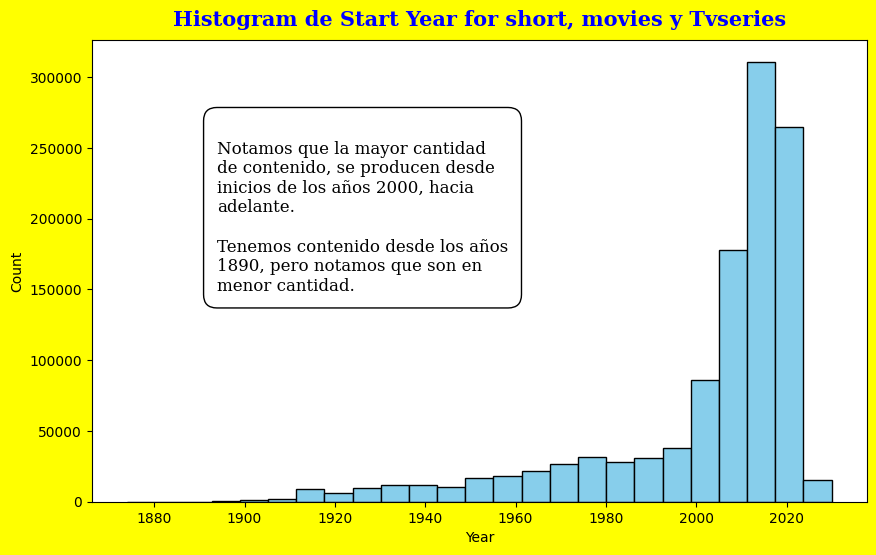

In [39]:
# Crear el histograma
plt.figure(figsize=(10, 6))
plt.hist(df_title_basics['startYear'], bins=25, color='skyblue', edgecolor='black')


# Establecer el color de fondo del gráfico
plt.gcf().set_facecolor('yellow')

# Añadir texto de conclusión
conclusion_text = '''
Notamos que la mayor cantidad
de contenido, se producen desde
inicios de los años 2000, hacia
adelante.

Tenemos contenido desde los años
1890, pero notamos que son en
menor cantidad.'''

plt.figtext(0.25, 0.6, conclusion_text, fontdict={'fontsize': 12, 'fontfamily':'serif', 'fontstyle':'normal', 'fontweight': 'normal', 'color': 'black'}, va='center', ha='left',
                     bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.8'))

plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Histogram de Start Year for short, movies y Tvseries', pad=10,
          fontdict={'fontsize': 15, 'fontfamily':'serif', 'fontstyle':'normal', 'fontweight': 'heavy', 'color': 'blue'})
plt.grid(False)
plt.show()

In [40]:
df_title_basics.head()

tconst titleType           originalTitle  isAdult  startYear  \
0  tt0000001     short              Carmencita        0       1894   
1  tt0000002     short  Le clown et ses chiens        0       1892   
2  tt0000003     short          Pauvre Pierrot        0       1892   
3  tt0000004     short             Un bon bock        0       1892   
4  tt0000005     short        Blacksmith Scene        0       1893   

   runtimeMinutes                    genres  
0               1         Documentary,Short  
1               5           Animation,Short  
2               5  Animation,Comedy,Romance  
3              12           Animation,Short  
4               1              Comedy,Short

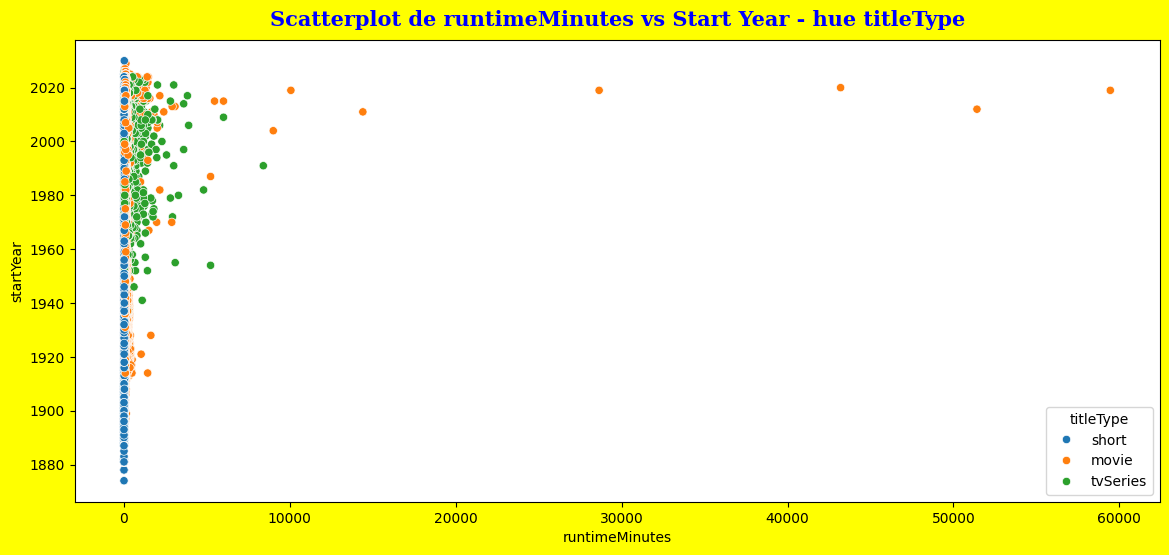

In [41]:
# Crear la figura
plt.figure(figsize=(14, 6))
sns.scatterplot(data=df_title_basics, x='runtimeMinutes', y='startYear', hue= 'titleType')

# Establecer el color de fondo del gráfico
plt.gcf().set_facecolor('yellow')

plt.title('Scatterplot de runtimeMinutes vs Start Year - hue titleType', pad=10,
          fontdict={'fontsize': 15, 'fontfamily':'serif', 'fontstyle':'normal', 'fontweight': 'heavy', 'color': 'blue'})
plt.grid(False)
plt.show()

* Aunque parezca increible, existen short para todos los años, desde 1880 hasta los 2024.
* Algunas movies son las que tienen una gran cantidad de minutos por contenido.

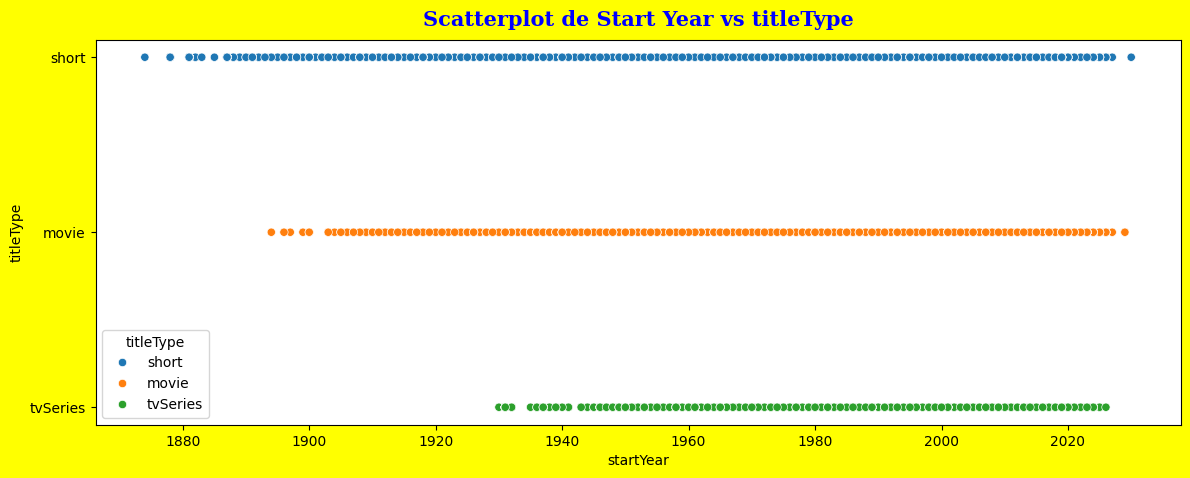

In [42]:
# Crear la figura
plt.figure(figsize=(14, 5))
sns.scatterplot(data=df_title_basics, x='startYear', y='titleType', hue= 'titleType')

# Establecer el color de fondo del gráfico
plt.gcf().set_facecolor('yellow')

plt.title('Scatterplot de Start Year vs titleType', pad=10,
          fontdict={'fontsize': 15, 'fontfamily':'serif', 'fontstyle':'normal', 'fontweight': 'heavy', 'color': 'blue'})
plt.grid(False)
plt.show()

* Vemos que los shorts, están presenten para todos los años.
* Las series recién empiezan por los años 1930.
* Tenemos para todos los años desde sus inicios para los tres tipos de contenido.

### 2.3.2 EDA - df_title_ratings

In [43]:
df_title_ratings.describe(percentiles=[0.05,0.1,0.15,0.2,0.25,0.3,0.45,0.5,0.55,0.65,0.75,0.85,0.90,0.95,0.975,0.99])

averageRating   numVotes
count     1450431.00 1450431.00
mean            6.96    1031.83
std             1.38   17703.09
min             1.00       5.00
5%              4.40       6.00
10%             5.20       7.00
15%             5.60       9.00
20%             5.90      10.00
25%             6.20      11.00
30%             6.40      13.00
45%             7.00      21.00
50%             7.20      26.00
55%             7.30      32.00
65%             7.60      52.00
75%             7.90     101.00
85%             8.20     248.00
90%             8.50     476.00
95%             8.90    1342.00
97.5%           9.20    3350.00
99%             9.60   10670.70
max            10.00 2908911.00

* Luego de analizar los percentiles, y de acuerdo a lo que deseamos, que es recomendar el mejor contenido, para tener más audiencia. Decidimos que debemos tener un average rating mayor de 5 y numero de votos grande, lo cual nos indica que es un contenido que se visualiza mucho y genera interacción.

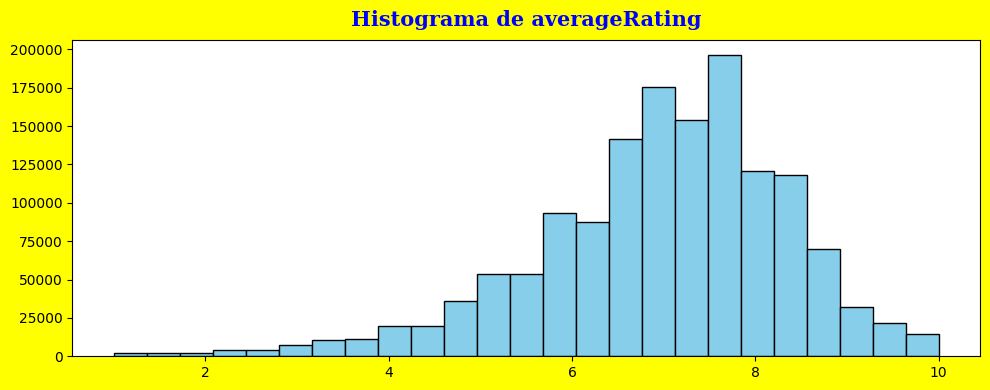

In [44]:
# Crear el histograma
plt.figure(figsize=(10, 4))
plt.hist(df_title_ratings['averageRating'], bins=25, color='skyblue', edgecolor='black')


# Establecer el color de fondo del gráfico
plt.gcf().set_facecolor('yellow')

plt.title('Histograma de averageRating', pad=10,
          fontdict={'fontsize': 15, 'fontfamily':'serif', 'fontstyle':'normal', 'fontweight': 'heavy', 'color': 'blue'})

# Mostrar la figura
plt.tight_layout()
plt.show()

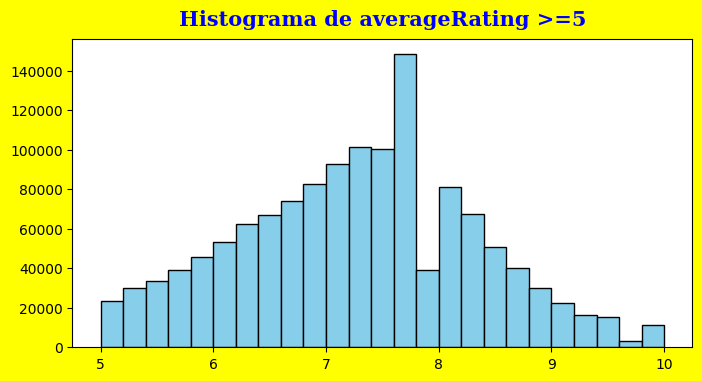

In [45]:
df_title_ratings_modified = df_title_ratings[df_title_ratings['averageRating']>=5]

# Crear el histograma
plt.figure(figsize=(8, 4))
plt.hist(df_title_ratings_modified['averageRating'], bins=25, color='skyblue', edgecolor='black')

# Establecer el color de fondo del gráfico
plt.gcf().set_facecolor('yellow')

plt.title('Histograma de averageRating >=5', pad=10,
          fontdict={'fontsize': 15, 'fontfamily':'serif', 'fontstyle':'normal', 'fontweight': 'heavy', 'color': 'blue'})

plt.show()

In [46]:
df_title_ratings_modified.describe(percentiles=[0.05,0.1,0.15,0.2,0.25,0.3,0.45,0.5,0.55,0.65,0.75,0.85,0.90,0.95,0.975,0.99])

averageRating   numVotes
count     1331026.00 1331026.00
mean            7.23    1085.65
std             1.05   18446.90
min             5.00       5.00
5%              5.40       6.00
10%             5.80       7.00
15%             6.00       8.00
20%             6.30      10.00
25%             6.50      11.00
30%             6.70      13.00
45%             7.10      21.00
50%             7.30      25.00
55%             7.40      31.00
65%             7.70      51.00
75%             8.00      97.00
85%             8.30     241.00
90%             8.60     468.00
95%             9.00    1353.00
97.5%           9.30    3433.00
99%             9.70   11309.00
max            10.00 2908911.00

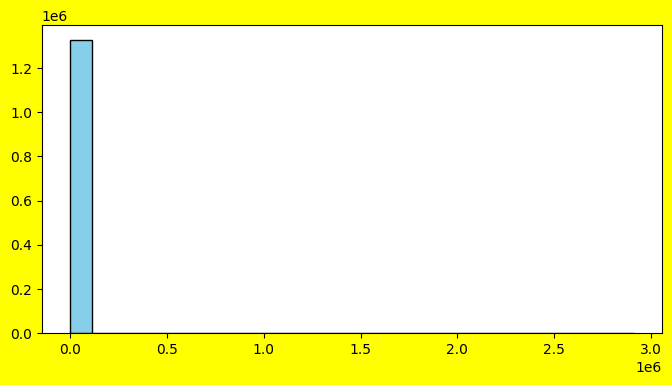

In [47]:
# Crear el histograma
plt.figure(figsize=(8, 4))
plt.hist(df_title_ratings_modified['numVotes'], bins=25, color='skyblue', edgecolor='black')

# Establecer el color de fondo del gráfico
plt.gcf().set_facecolor('yellow')

plt.show()

<ipython-input-48-3fd40242a0c0>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_title_ratings_modified['numVotes'], orient='h', palette='viridis')


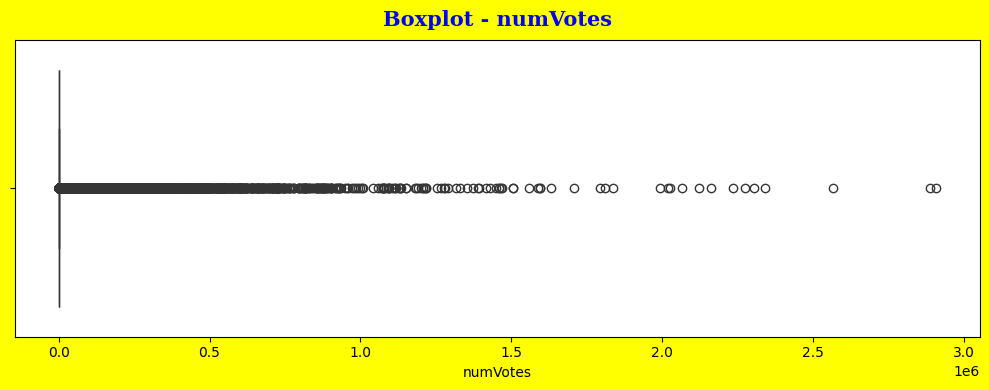

In [48]:
# Crear la figura
plt.figure(figsize=(10, 4))

sns.boxplot(x=df_title_ratings_modified['numVotes'], orient='h', palette='viridis')
plt.title('Boxplot - numVotes', pad=10, fontdict={'fontsize': 15, 'fontfamily':'serif', 'fontstyle':'normal', 'fontweight': 'heavy', 'color': 'blue'})

# Establecer el color de fondo del gráfico
plt.gcf().set_facecolor('yellow')

# Mostrar la figura
plt.tight_layout()
plt.show()

* Si bien vemos que hay contenido que tiene votos muy grandes, pero son casos especificos. Sin embargo, ya realizamos un filtrado con el rating, el cual consideramos es muy valioso a tener en cuenta, entonces con esto, valoraremos también estos casos especificos de cantidad de votos para el contenido especfico. Más bien los que tienen pocos votos, se podrían descartar, ya que nos indicaría que las personas no les agrado mucho, tenemos que evaluar esto con el rating.

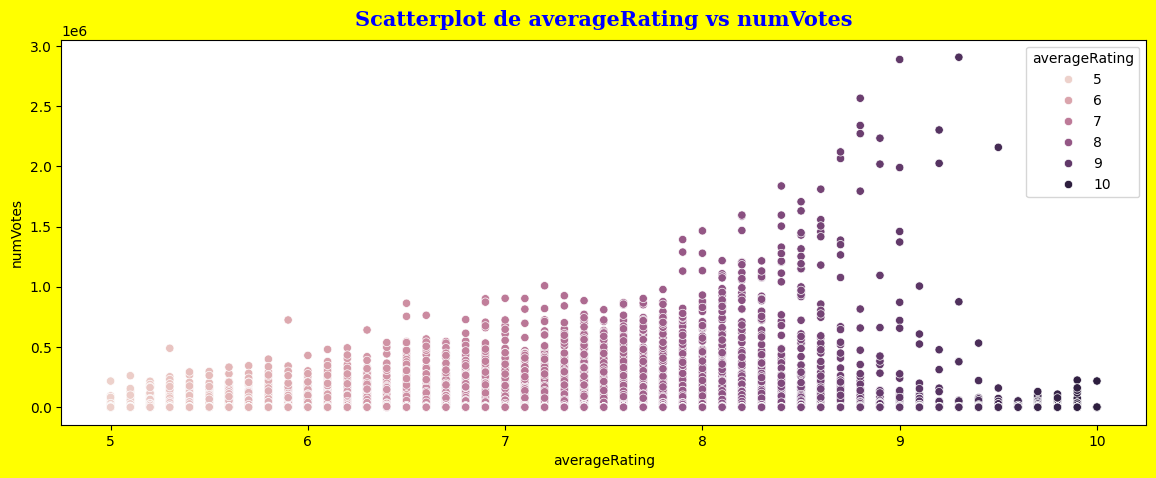

In [ ]:
# Crear la figura
plt.figure(figsize=(14, 5))
sns.scatterplot(data=df_title_ratings_modified, x='averageRating', y='numVotes', hue= 'averageRating')

plt.title('Scatterplot de averageRating vs numVotes', pad=10, fontdict={'fontsize': 15, 'fontfamily':'serif', 'fontstyle':'normal', 'fontweight': 'heavy', 'color': 'blue'})

# Establecer el color de fondo del gráfico
plt.gcf().set_facecolor('yellow')
plt.show()

* Observamos que para los ratings, tenemos votos existentes. Por esto, por el momento no descartamos ninguna cantidad de votos.
* Se habia restringido la cantidad de ratings, para tenerlo desde 5 a 10. Sin embargo, como nuestro objetivo es mejorar la plataforma con buen contenido, entonces vemos que a medida que el rating es mayor, la cantidad de votos tiene un incremento. Por esta razón decidimos quedarnos con ratings mayores de 6.

In [49]:
## Acotando para ratings mayores de 6
df_title_ratings_modified = df_title_ratings_modified[df_title_ratings_modified['averageRating']>=6]

In [50]:
# Realizando un inner join para poder analizar entre variables
df_title_basics_inner = pd.merge(df_title_basics, df_title_ratings_modified, on='tconst', how='inner')
df_title_basics_inner.head()

tconst titleType                        originalTitle  isAdult  \
0  tt0000003     short                       Pauvre Pierrot        0   
1  tt0000005     short                     Blacksmith Scene        0   
2  tt0000010     short  La sortie de l'usine Lumière à Lyon        0   
3  tt0000012     short     L'arrivée d'un train à La Ciotat        0   
4  tt0000014     short                    L'arroseur arrosé        0   

   startYear  runtimeMinutes                    genres  averageRating  \
0       1892               5  Animation,Comedy,Romance           6.50   
1       1893               1              Comedy,Short           6.20   
2       1895               1         Documentary,Short           6.80   
3       1896               1         Documentary,Short           7.40   
4       1895               1              Comedy,Short           7.10   

   numVotes  
0      2026  
1      2793  
2      7608  
3     12946  
4      5882

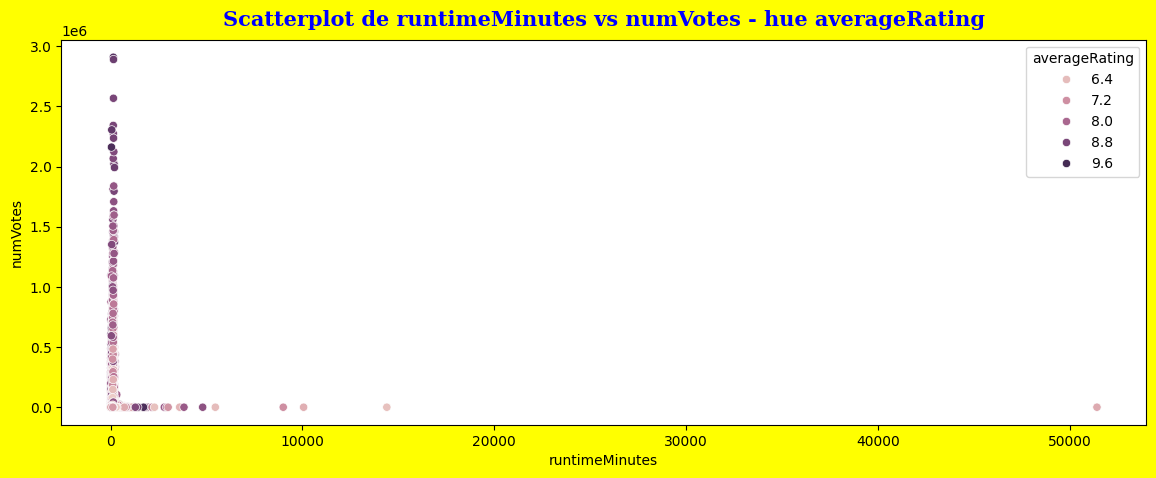

In [51]:
# Creamos la figura
plt.figure(figsize=(14, 5))
sns.scatterplot(data=df_title_basics_inner, x='runtimeMinutes', y='numVotes', hue= 'averageRating')

plt.title('Scatterplot de runtimeMinutes vs numVotes - hue averageRating', pad=10,
          fontdict={'fontsize': 15, 'fontfamily':'serif', 'fontstyle':'normal', 'fontweight': 'heavy', 'color': 'blue'})

# Establecer el color de fondo del gráfico
plt.gcf().set_facecolor('yellow')
plt.show()

* Observamos que la mayoría de contenido, con más votos, tiene menos tiempo de producción. Dado esto, decidimos acotar el runtimeMinutes de nuestro contenido, para continuar analizando. Decidimos bajar la cantidad de minutos a 500 minutos, considerando que tambien algunos tipos de contenido con bastantes minutos tienen rating alto, tomarémos el riesgo de acotar en 500 minutos.

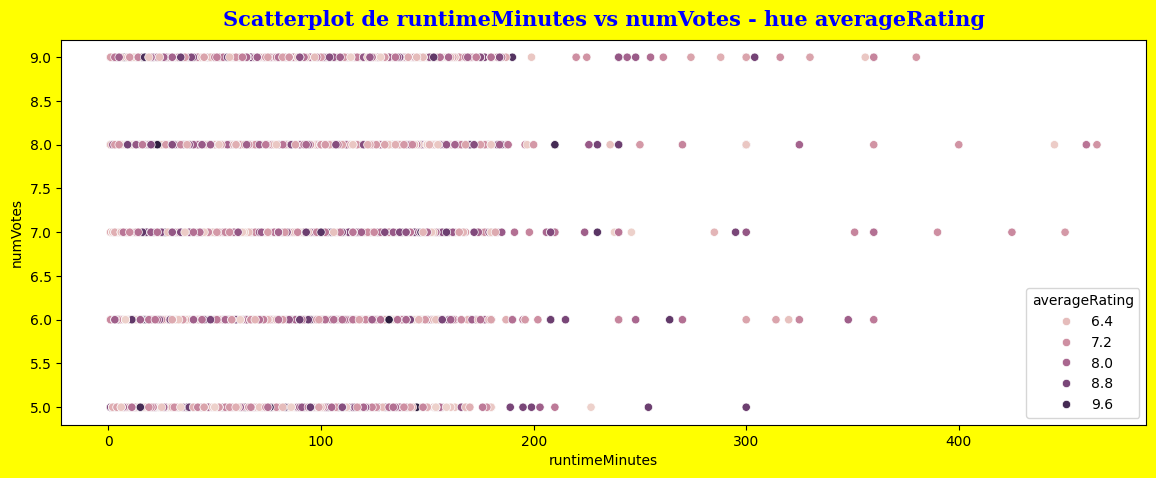

In [62]:
## Observando la grafica con el contenido acotado a runtimeMinutes<500

# Creamos la figura
plt.figure(figsize=(14, 5))
sns.scatterplot(data=df_title_basics_inner[(df_title_basics_inner['runtimeMinutes']<500)&(df_title_basics_inner['numVotes']<10)],
                x='runtimeMinutes', y='numVotes',
                hue= 'averageRating')

plt.title('Scatterplot de runtimeMinutes vs numVotes - hue averageRating', pad=10,
          fontdict={'fontsize': 15, 'fontfamily':'serif', 'fontstyle':'normal', 'fontweight': 'heavy', 'color': 'blue'})

# Establecer el color de fondo del gráfico
plt.gcf().set_facecolor('yellow')
plt.show()

* Notamos que no existe contenido sin número de votos, por lo menos todos tienen 5 votos. Ahora considerando que queremos recomendar contenido con buen rating, pero que también las personas puedan aceptarlo, consideramos que un número bajo de votos no sería válido para nuestro análisis, es así que decidimos contabilizar un número de votos >25 para poder recomendar contenido, de esta manera vamos a acotarlo.

In [63]:
df_title_basics_inner = df_title_basics_inner[df_title_basics_inner['runtimeMinutes']<500]
df_title_basics_inner.head()

tconst titleType                        originalTitle  isAdult  \
0  tt0000003     short                       Pauvre Pierrot        0   
1  tt0000005     short                     Blacksmith Scene        0   
2  tt0000010     short  La sortie de l'usine Lumière à Lyon        0   
3  tt0000012     short     L'arrivée d'un train à La Ciotat        0   
4  tt0000014     short                    L'arroseur arrosé        0   

   startYear  runtimeMinutes                    genres  averageRating  \
0       1892               5  Animation,Comedy,Romance           6.50   
1       1893               1              Comedy,Short           6.20   
2       1895               1         Documentary,Short           6.80   
3       1896               1         Documentary,Short           7.40   
4       1895               1              Comedy,Short           7.10   

   numVotes  
0      2026  
1      2793  
2      7608  
3     12946  
4      5882

In [64]:
df_title_basics_inner.info()

<class 'pandas.core.frame.DataFrame'>
Index: 312345 entries, 0 to 312547
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   tconst          312345 non-null  string 
 1   titleType       312345 non-null  string 
 2   originalTitle   312345 non-null  string 
 3   isAdult         312345 non-null  int64  
 4   startYear       312345 non-null  int64  
 5   runtimeMinutes  312345 non-null  int64  
 6   genres          312345 non-null  string 
 7   averageRating   312345 non-null  float64
 8   numVotes        312345 non-null  int64  
dtypes: float64(1), int64(4), string(4)
memory usage: 32.5 MB


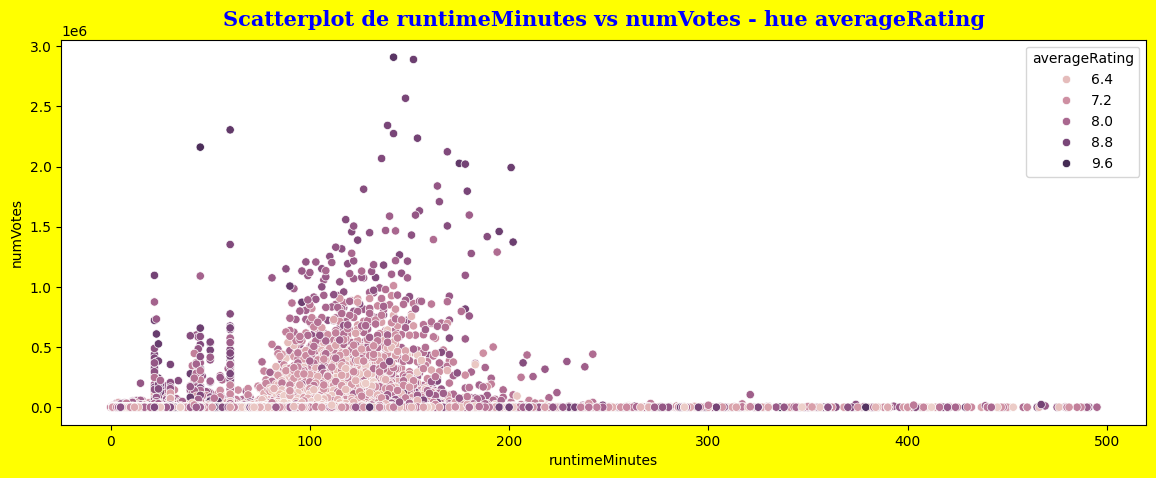

In [65]:
# Creamos la figura
plt.figure(figsize=(14, 5))
sns.scatterplot(data=df_title_basics_inner, x='runtimeMinutes', y='numVotes', hue= 'averageRating')

plt.title('Scatterplot de runtimeMinutes vs numVotes - hue averageRating', pad=10,
          fontdict={'fontsize': 15, 'fontfamily':'serif', 'fontstyle':'normal', 'fontweight': 'heavy', 'color': 'blue'})

# Establecer el color de fondo del gráfico
plt.gcf().set_facecolor('yellow')
plt.show()

* Verificamos en la gráfica que obtenemos mayores rantings de valores de 9 y 10, con mayor cantidad de votos, para contenido que tiene una duración de 100 y 200 minutos.
* Tambien podemos notar que existen altos ratings para contenido de pocos minutos, posiblemente para los shorts. Es importante tener en cuenta esto.
* Con esto analizado, procedemos a acotar nuestro **runtimeMinutes** a los 200 minutos, se generará un nuevo dataframe. Esto debido a que si bien necesitamos que tengan rating, pero tambien queremos que tengan más votos, lo cual nos representa más interacción del publico.

In [66]:
## Acotando nuestros minutos máximos a 250, consideramos de esta manera, rating y numVotes

df_title_basics_modified = df_title_basics[df_title_basics['runtimeMinutes']<=200]
df_title_basics_modified.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1127096 entries, 0 to 787181
Data columns (total 7 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   tconst          1127096 non-null  string
 1   titleType       1127096 non-null  string
 2   originalTitle   1127096 non-null  string
 3   isAdult         1127096 non-null  int64 
 4   startYear       1127096 non-null  int64 
 5   runtimeMinutes  1127096 non-null  int64 
 6   genres          1127096 non-null  string
dtypes: int64(3), string(4)
memory usage: 99.7 MB


In [67]:
## Acotando para número de votos mayores a 25

df_title_ratings_modified = df_title_ratings_modified[df_title_ratings_modified['numVotes']>=25]
df_title_ratings_modified.info()

<class 'pandas.core.frame.DataFrame'>
Index: 586094 entries, 2 to 1450428
Data columns (total 3 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   tconst         586094 non-null  string 
 1   averageRating  586094 non-null  float64
 2   numVotes       586094 non-null  int64  
dtypes: float64(1), int64(1), string(1)
memory usage: 20.9 MB


### 2.3.2 EDA - df_tmdb

In [68]:
df_tmdb.describe()

vote_average  vote_count                   release_date       revenue  \
count       6609.00     6609.00                           6609       6609.00   
mean           6.41     2070.39  1999-07-02 00:48:35.297321856   96046099.88   
min            0.00        0.00            1913-11-24 00:00:00          2.00   
25%            6.00       98.00            1991-04-12 00:00:00    6582065.00   
50%            6.60      704.00            2006-03-17 00:00:00   31500000.00   
75%            7.18     2411.00            2014-03-19 00:00:00  102278712.00   
max           10.00    34495.00            2024-06-01 00:00:00 2923706026.00   
std            1.47     3498.02                            NaN  184650572.51   

       runtime       budget  popularity        roi  
count  6609.00      6609.00     6609.00    6609.00  
mean    108.14  26492242.65       22.80     904.35  
min       0.00         1.00        0.00       0.00  
25%      94.00   1768000.00        7.80       0.82  
50%     106.00  10000000.00       15.21       1.97  
75%     122.00  30000000.00       24.17       4.55  
max     279.00 460000000.00     2994.36 2755583.00  
std      27.81  42728328.71       71.62   41118.09

<ipython-input-69-0a78a19e266a>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_tmdb['revenue'], orient='h', palette='viridis')
<ipython-input-69-0a78a19e266a>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_tmdb['budget'], orient='h', palette='viridis')
<ipython-input-69-0a78a19e266a>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_tmdb['roi'], orient='h', palette='viridis')


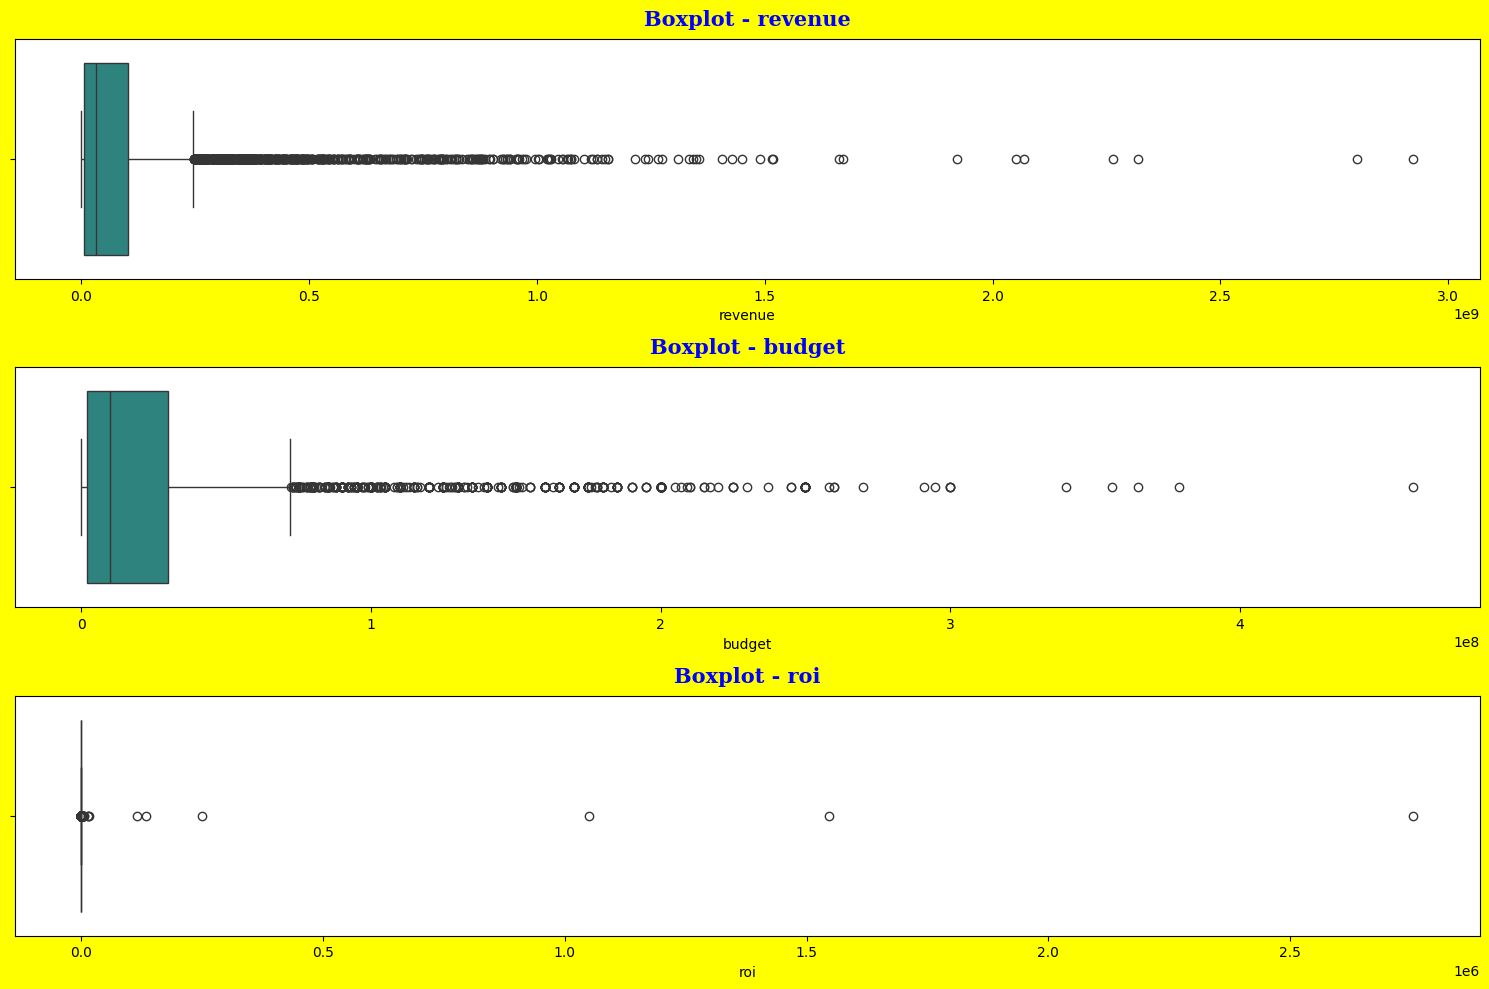

In [69]:
# Crear la figura y los subplots
plt.figure(figsize=(15, 10))

# Primer subplot: Boxplot de 'revenue'
plt.subplot(3, 1, 1)
sns.boxplot(x=df_tmdb['revenue'], orient='h', palette='viridis')
plt.title('Boxplot - revenue', pad=10, fontdict={'fontsize': 15, 'fontfamily':'serif', 'fontstyle':'normal', 'fontweight': 'heavy', 'color': 'blue'})

# Segundo subplot: Boxplot de 'budget'
plt.subplot(3, 1, 2)
sns.boxplot(x=df_tmdb['budget'], orient='h', palette='viridis')
plt.title('Boxplot - budget', pad=10, fontdict={'fontsize': 15, 'fontfamily':'serif', 'fontstyle':'normal', 'fontweight': 'heavy', 'color': 'blue'})

# Segundo subplot: Boxplot de 'roi'
plt.subplot(3, 1, 3)
sns.boxplot(x=df_tmdb['roi'], orient='h', palette='viridis')
plt.title('Boxplot - roi', pad=10, fontdict={'fontsize': 15, 'fontfamily':'serif', 'fontstyle':'normal', 'fontweight': 'heavy', 'color': 'blue'})

# Establecer el color de fondo del gráfico
plt.gcf().set_facecolor('yellow')

# Mostrar la figura
plt.tight_layout()
plt.show()

<ipython-input-70-b12d1ea86a12>:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_tmdb_modified['revenue'], orient='h', palette='viridis')
<ipython-input-70-b12d1ea86a12>:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_tmdb_modified['budget'], orient='h', palette='viridis')
<ipython-input-70-b12d1ea86a12>:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_tmdb_modified['roi'], orient='h', palette='viridis')


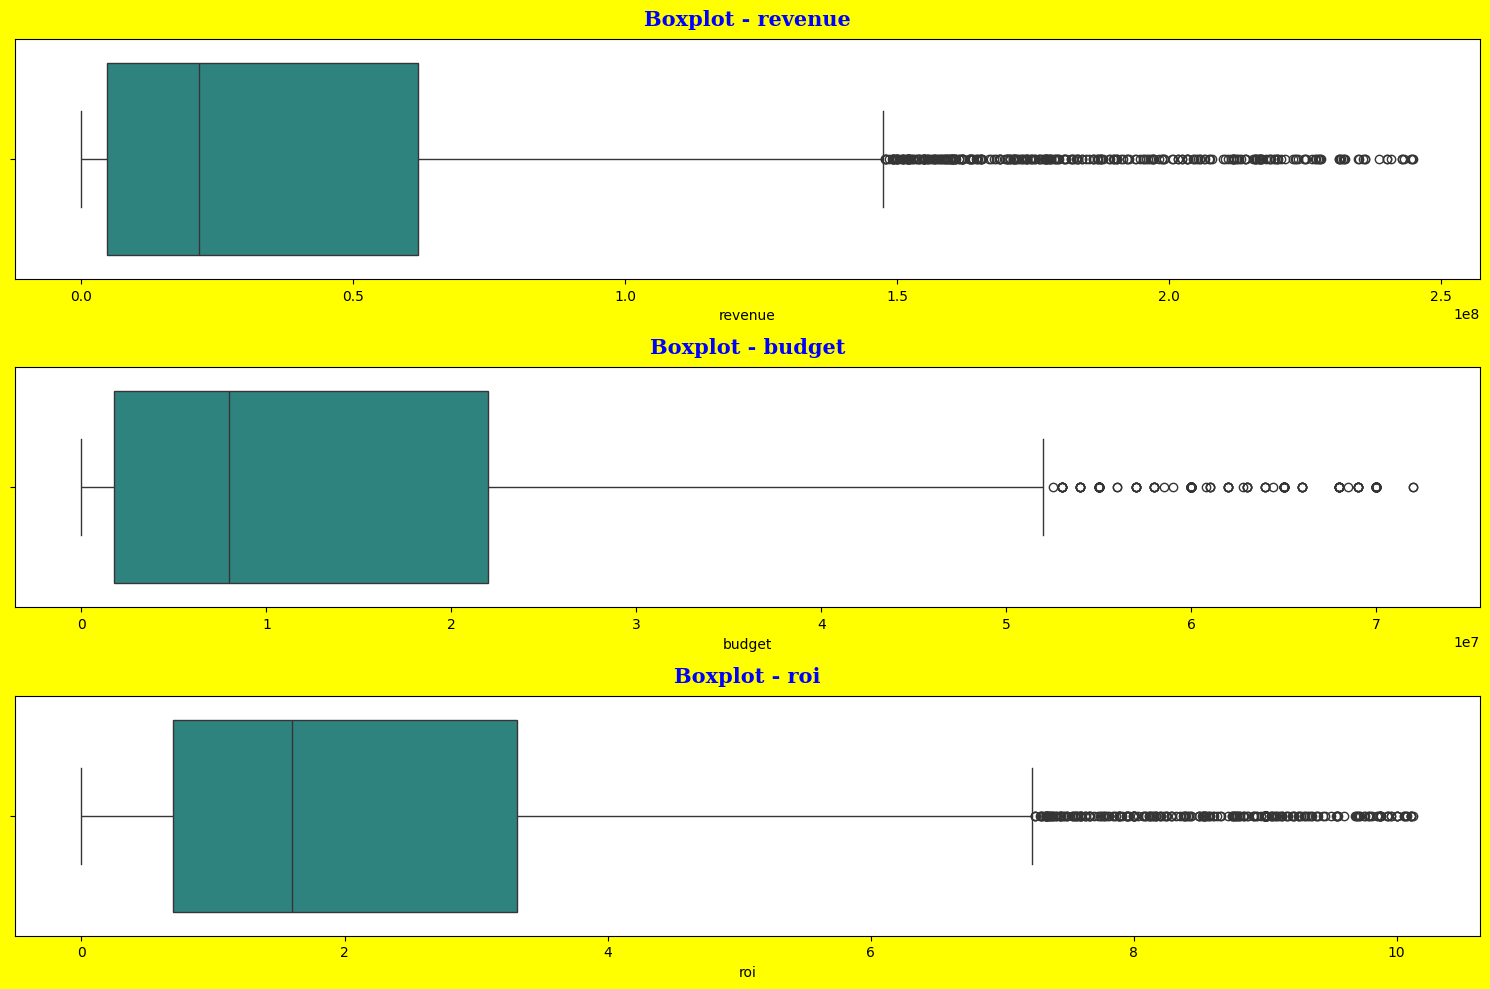

In [70]:
# Calcular Q1 y Q3 para revenue, budget y roi
Q1_revenue = df_tmdb['revenue'].quantile(0.25)
Q3_revenue = df_tmdb['revenue'].quantile(0.75)
IQR_revenue = Q3_revenue - Q1_revenue

Q1_budget = df_tmdb['budget'].quantile(0.25)
Q3_budget = df_tmdb['budget'].quantile(0.75)
IQR_budget = Q3_budget - Q1_budget

Q1_roi = df_tmdb['roi'].quantile(0.25)
Q3_roi = df_tmdb['roi'].quantile(0.75)
IQR_roi = Q3_roi - Q1_roi

# Definir los límites
lower_bound_revenue = Q1_revenue - 1.5 * IQR_revenue
upper_bound_revenue = Q3_revenue + 1.5 * IQR_revenue

lower_bound_budget = Q1_budget - 1.5 * IQR_budget
upper_bound_budget = Q3_budget + 1.5 * IQR_budget

lower_bound_roi = Q1_roi - 1.5 * IQR_roi
upper_bound_roi = Q3_roi + 1.5 * IQR_roi

# # Filtrar el DataFrame para excluir los outliers
df_tmdb_modified = df_tmdb[
    (df_tmdb['revenue'] <= upper_bound_revenue) & (df_tmdb['budget'] <= upper_bound_budget) & (df_tmdb['roi'] <= upper_bound_roi) &
    (df_tmdb['revenue'] >= lower_bound_revenue) & (df_tmdb['budget'] >= lower_bound_budget) & (df_tmdb['roi'] >= lower_bound_roi)]

# df_tmdb_modified = df_tmdb.copy()
# df_tmdb_modified['revenue'] = df_tmdb['revenue'].clip(lower=lower_bound_revenue, upper=upper_bound_revenue)
# df_tmdb_modified['budget'] = df_tmdb['budget'].clip(lower=lower_bound_budget, upper=upper_bound_budget)
# df_tmdb_modified['roi'] = df_tmdb['roi'].clip(lower=lower_bound_roi, upper=upper_bound_roi)

# Crear la figura y los subplots
plt.figure(figsize=(15, 10))

# Primer subplot: Boxplot de 'startYear'
plt.subplot(3, 1, 1)
sns.boxplot(x=df_tmdb_modified['revenue'], orient='h', palette='viridis')
plt.title('Boxplot - revenue', pad=10, fontdict={'fontsize': 15, 'fontfamily':'serif', 'fontstyle':'normal', 'fontweight': 'heavy', 'color': 'blue'})

# Segundo subplot: Boxplot de 'runtimeMinutes'
plt.subplot(3, 1, 2)
sns.boxplot(x=df_tmdb_modified['budget'], orient='h', palette='viridis')
plt.title('Boxplot - budget', pad=10, fontdict={'fontsize': 15, 'fontfamily':'serif', 'fontstyle':'normal', 'fontweight': 'heavy', 'color': 'blue'})

# Segundo subplot: Boxplot de 'roi'
plt.subplot(3, 1, 3)
sns.boxplot(x=df_tmdb_modified['roi'], orient='h', palette='viridis')
plt.title('Boxplot - roi', pad=10, fontdict={'fontsize': 15, 'fontfamily':'serif', 'fontstyle':'normal', 'fontweight': 'heavy', 'color': 'blue'})

# Establecer el color de fondo del gráfico
plt.gcf().set_facecolor('yellow')

plt.tight_layout()
plt.show()

In [71]:
df_tmdb_modified.describe()

vote_average  vote_count                   release_date      revenue  \
count       5110.00     5110.00                           5110      5110.00   
mean           6.34     1215.50  1998-07-25 04:10:31.232876672  42493739.93   
min            0.00        0.00            1914-04-25 00:00:00         2.00   
25%            5.92       68.00            1989-12-02 00:00:00   4635182.25   
50%            6.54      472.00            2005-09-08 00:00:00  21615044.00   
75%            7.12     1545.00            2013-10-28 18:00:00  61798576.50   
max           10.00    27238.00            2024-06-01 00:00:00 244931766.00   
std            1.52     1956.28                            NaN  51262495.83   

       runtime      budget  popularity     roi  
count  5110.00     5110.00     5110.00 5110.00  
mean    106.99 14709134.79       17.06    2.38  
min       0.00        1.00        0.00    0.00  
25%      93.00  1750500.00        6.70    0.69  
50%     105.00  8000000.00       13.62    1.60  
75%     120.00 22000000.00       20.16    3.31  
max     279.00 72000000.00     2680.59   10.13  
std      28.21 16840241.35       49.60    2.30

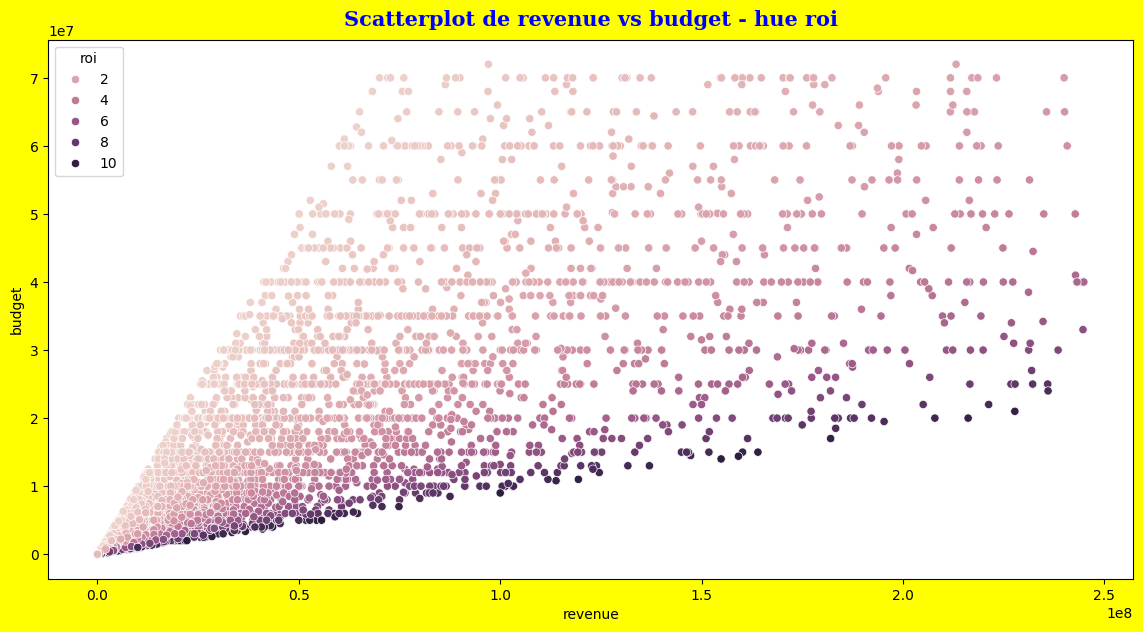

In [72]:
# Creamos la figura
plt.figure(figsize=(14, 7))
sns.scatterplot(data=df_tmdb_modified, x='revenue', y='budget', hue= 'roi')

plt.title('Scatterplot de revenue vs budget - hue roi', pad=10,
          fontdict={'fontsize': 15, 'fontfamily':'serif', 'fontstyle':'normal', 'fontweight': 'heavy', 'color': 'blue'})

# Establecer el color de fondo del gráfico
plt.gcf().set_facecolor('yellow')
plt.show()

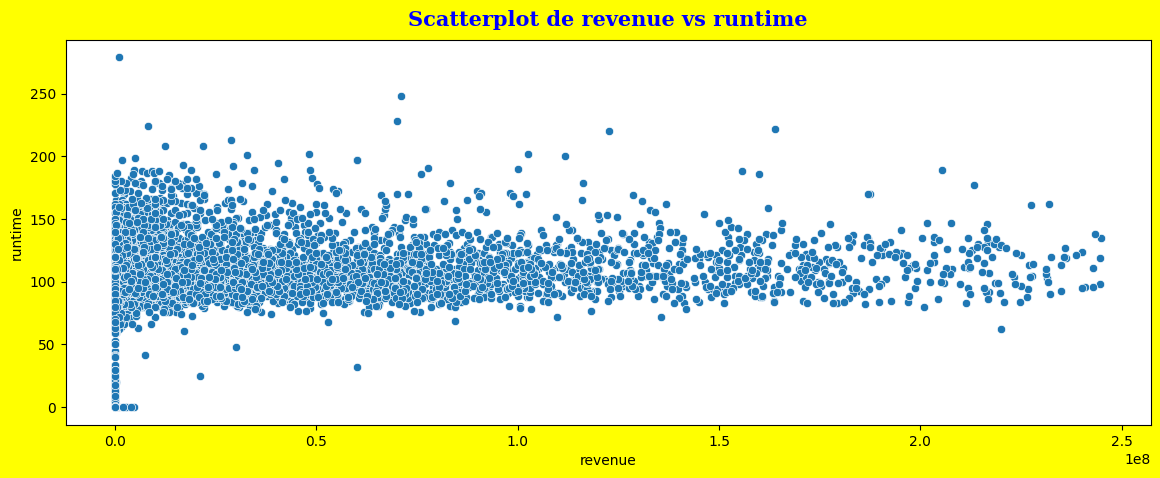

In [73]:
# Creamos la figura
plt.figure(figsize=(14, 5))
sns.scatterplot(data=df_tmdb_modified, x='revenue', y='runtime')

plt.title('Scatterplot de revenue vs runtime', pad=10,
          fontdict={'fontsize': 15, 'fontfamily':'serif', 'fontstyle':'normal', 'fontweight': 'heavy', 'color': 'blue'})

# Establecer el color de fondo del gráfico
plt.gcf().set_facecolor('yellow')
plt.show()

* Vemos que el contenido que nos produce mayor revenue tiene un tiempo de duración entre 50 y 200 minutos, esto nos da un indicio que las movies y tvseries podrían estar encabezando.
* Validaremos los shorts, ya que al parecer no tiene mucho revenue, pero quizás no tiene mucho budget y podria generar muchos benficios.

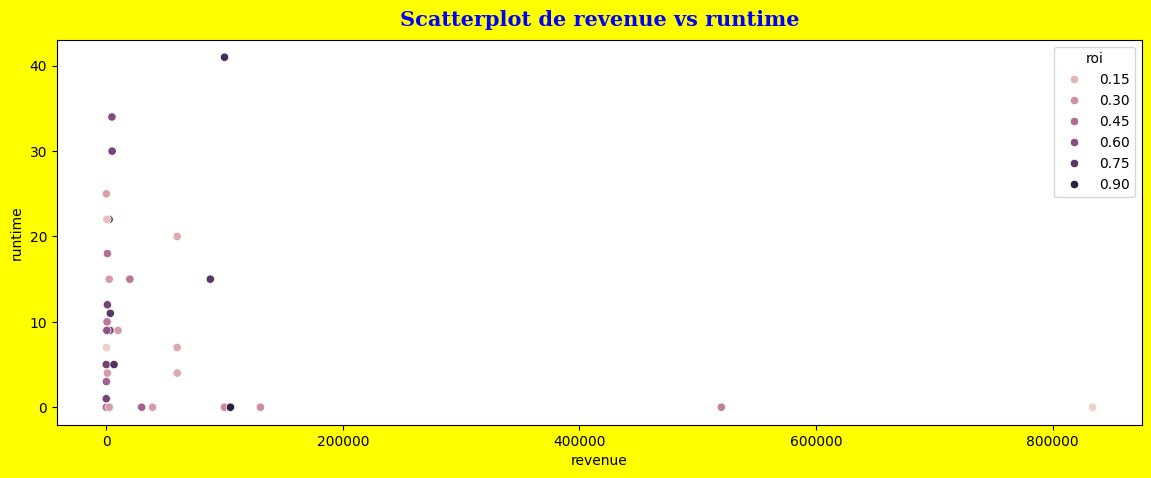

In [79]:
## Validando los shorts
# Creamos la figura
plt.figure(figsize=(14, 5))
sns.scatterplot(data=df_tmdb_modified[(df_tmdb_modified['runtime']<50)&(df_tmdb_modified['revenue']<2000000)&(df_tmdb_modified['roi']<1)],
                x='revenue', y='runtime',hue='roi')

plt.title('Scatterplot de revenue vs runtime', pad=10,
          fontdict={'fontsize': 15, 'fontfamily':'serif', 'fontstyle':'normal', 'fontweight': 'heavy', 'color': 'blue'})

# Establecer el color de fondo del gráfico
plt.gcf().set_facecolor('yellow')
plt.show()

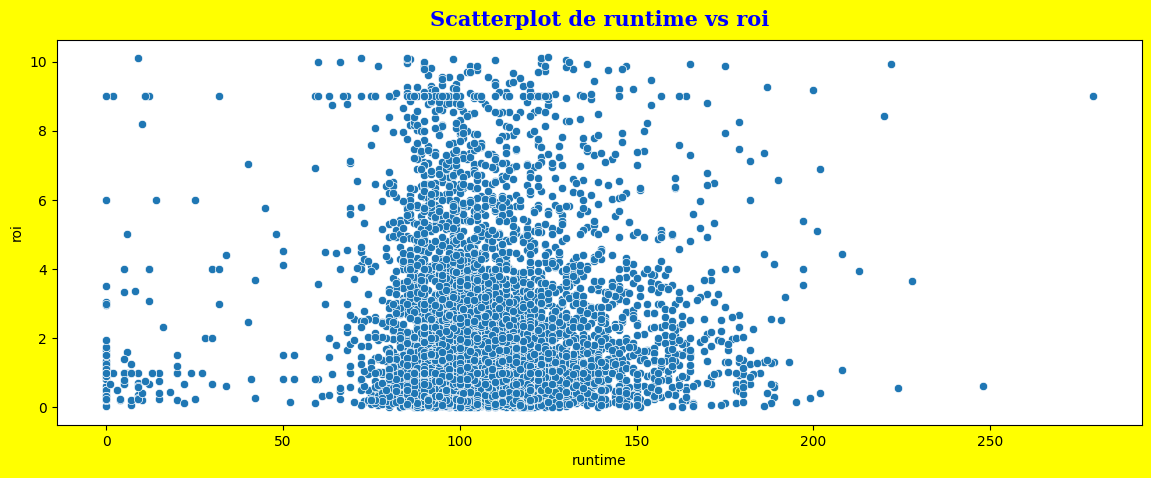

In [80]:
# Creamos la figura
plt.figure(figsize=(14, 5))
sns.scatterplot(data=df_tmdb_modified, x='runtime', y='roi')

plt.title('Scatterplot de runtime vs roi', pad=10,
          fontdict={'fontsize': 15, 'fontfamily':'serif', 'fontstyle':'normal', 'fontweight': 'heavy', 'color': 'blue'})

# Establecer el color de fondo del gráfico
plt.gcf().set_facecolor('yellow')
plt.show()

* Segun esto podemos validar que hay algunos shorts que nos generar cierto roi favorable. Considerando que mientras más se acerca a 10 es buen Roi.
* La mayoría de contenido que tiene un roi favorable, estan entre 50 y 200 minutos, pero tambien, en este tramo, hay contenido que el roi es muy bajo.

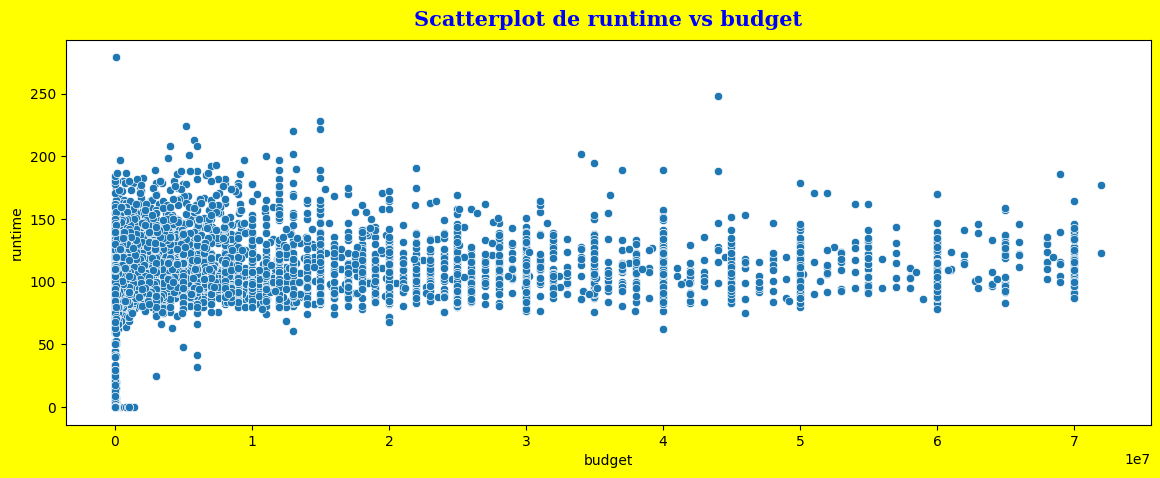

In [81]:
# Creamos la figura
plt.figure(figsize=(14, 5))
sns.scatterplot(data=df_tmdb_modified, x='budget', y='runtime')

plt.title('Scatterplot de runtime vs budget', pad=10,
          fontdict={'fontsize': 15, 'fontfamily':'serif', 'fontstyle':'normal', 'fontweight': 'heavy', 'color': 'blue'})

# Establecer el color de fondo del gráfico
plt.gcf().set_facecolor('yellow')
plt.show()

* COmo era de suponer, el mayor presupuesto se da en contenido que tiene entre 50 y 200 minutos.
* Notamos tambien que hay contenido que tiene presupuesto muy bajo, para todo tipo de tiempo.
* Validaremos con el roi.

## 3. PREGUNTAS Y RESPUESTAS

In [82]:
## Usaremos los siguientes dataframes analizados y acotados

print(df_title_basics_modified.info())
print('------------------------------------')
print(df_title_ratings_modified.info())
print('------------------------------------')
print(df_tmdb_modified.info())
print('------------------------------------')

<class 'pandas.core.frame.DataFrame'>
Index: 1127096 entries, 0 to 787181
Data columns (total 7 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   tconst          1127096 non-null  string
 1   titleType       1127096 non-null  string
 2   originalTitle   1127096 non-null  string
 3   isAdult         1127096 non-null  int64 
 4   startYear       1127096 non-null  int64 
 5   runtimeMinutes  1127096 non-null  int64 
 6   genres          1127096 non-null  string
dtypes: int64(3), string(4)
memory usage: 99.7 MB
None
------------------------------------
<class 'pandas.core.frame.DataFrame'>
Index: 586094 entries, 2 to 1450428
Data columns (total 3 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   tconst         586094 non-null  string 
 1   averageRating  586094 non-null  float64
 2   numVotes       586094 non-null  int64  
dtypes: float64(1), int64(1), string(1)
memory usage: 20.

## Pregunta 1: ¿Cual es la evolución del rating por tipo de contenido?

In [83]:
title_type_counts = df_title_basics_modified['titleType'].value_counts().reset_index()
title_type_counts

titleType   count
0     short  636110
1     movie  396837
2  tvSeries   94149

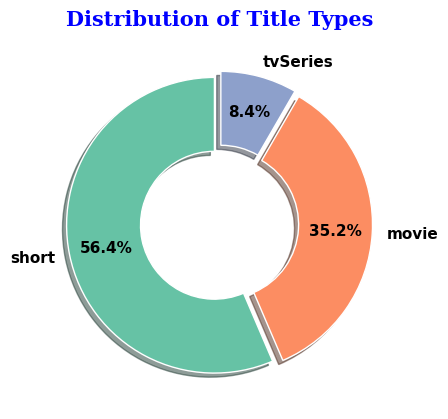

In [84]:
# Crear el gráfico de pie
fig, ax = plt.subplots()

explode = (0.035, 0.035, 0.035)
ax.pie(title_type_counts['count'], labels=title_type_counts['titleType'], autopct='%1.1f%%', startangle=90,
       explode=explode, textprops={'fontsize': 11,'weight': 'bold'}, pctdistance=0.75, wedgeprops=dict(width=0.5, edgecolor='w'),
       labeldistance=1.1, colors=plt.cm.Set2.colors, shadow=True)

# Título del gráfico
ax.set_title('Distribution of Title Types', pad=10,
          fontdict={'fontsize': 15, 'fontfamily':'serif', 'fontstyle':'normal', 'fontweight': 'heavy', 'color': 'blue'})

# Establecer el color de fondo del gráfico
plt.gcf().set_facecolor('white')

# Mostrar el gráfico
plt.show()

In [85]:
subset = df_title_basics_modified[df_title_basics_modified['titleType'] == 'short']
avg_rating_by_year_short = subset.merge(df_title_ratings_modified, on='tconst').groupby('startYear')['averageRating'].mean()

subset = df_title_basics_modified[df_title_basics_modified['titleType'] == 'movie']
avg_rating_by_year_movie = subset.merge(df_title_ratings_modified, on='tconst').groupby('startYear')['averageRating'].mean()

subset = df_title_basics_modified[df_title_basics_modified['titleType'] == 'tvSeries']
avg_rating_by_year_tvSeries = subset.merge(df_title_ratings_modified, on='tconst').groupby('startYear')['averageRating'].mean()

In [86]:
avg_rating_by_year_tvSeries = avg_rating_by_year_tvSeries.reset_index()[avg_rating_by_year_tvSeries.reset_index()['startYear']>1960]
avg_rating_by_year_movie = avg_rating_by_year_movie.reset_index()[avg_rating_by_year_movie.reset_index()['startYear']>1960]
avg_rating_by_year_short = avg_rating_by_year_short.reset_index()[avg_rating_by_year_short.reset_index()['startYear']>1960]

In [87]:
avg_rating_by_year_tvSeries.head()

startYear  averageRating
16       1961           7.58
17       1962           7.61
18       1963           7.62
19       1964           7.70
20       1965           7.54

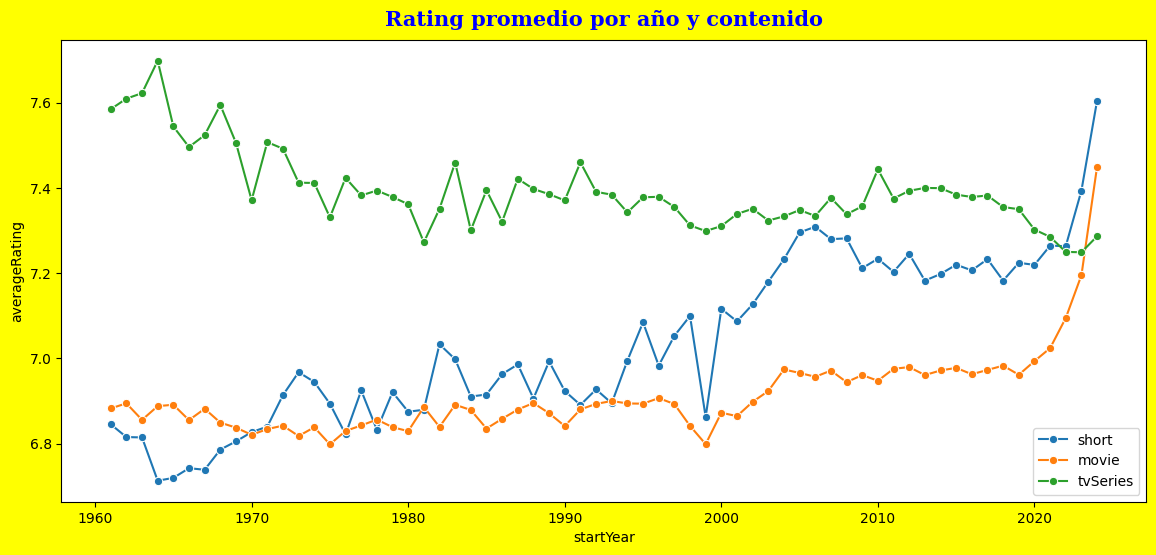

In [88]:
# Creamos la figura
plt.figure(figsize=(14, 6))

sns.lineplot(data=avg_rating_by_year_short, x='startYear', y='averageRating', marker='o', label='short')
sns.lineplot(data=avg_rating_by_year_movie, x='startYear', y='averageRating', marker='o', label='movie')
sns.lineplot(data=avg_rating_by_year_tvSeries, x='startYear', y='averageRating', marker='o', label='tvSeries')

plt.title('Rating promedio por año y contenido', pad=10,
          fontdict={'fontsize': 15, 'fontfamily':'serif', 'fontstyle':'normal', 'fontweight': 'heavy', 'color': 'blue'})

# Establecer el color de fondo del gráfico
plt.gcf().set_facecolor('yellow')

plt.show()

* Observamos que los shorts han tenido un rating en aumento constante, incluso para las fechas actuales son los que dan la hora. Se podria considerar recomendar short, quizás el publico actual esta influenciado por otras redes y por la disposición de tiempo y prefiere ver más shorts como si fueran reels de tiktok o youtube.
* Las movies también han tenido un aumento durante todos los años, mucho menos exponencial que los shorts. Por otro lado las tvSeries, si tuvieron un bajón, pero ultimamente han aumentado ligeramente.

<ipython-input-89-f5fa465d63ac>:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(ax2.get_xticklabels(), rotation=0, ha='right')


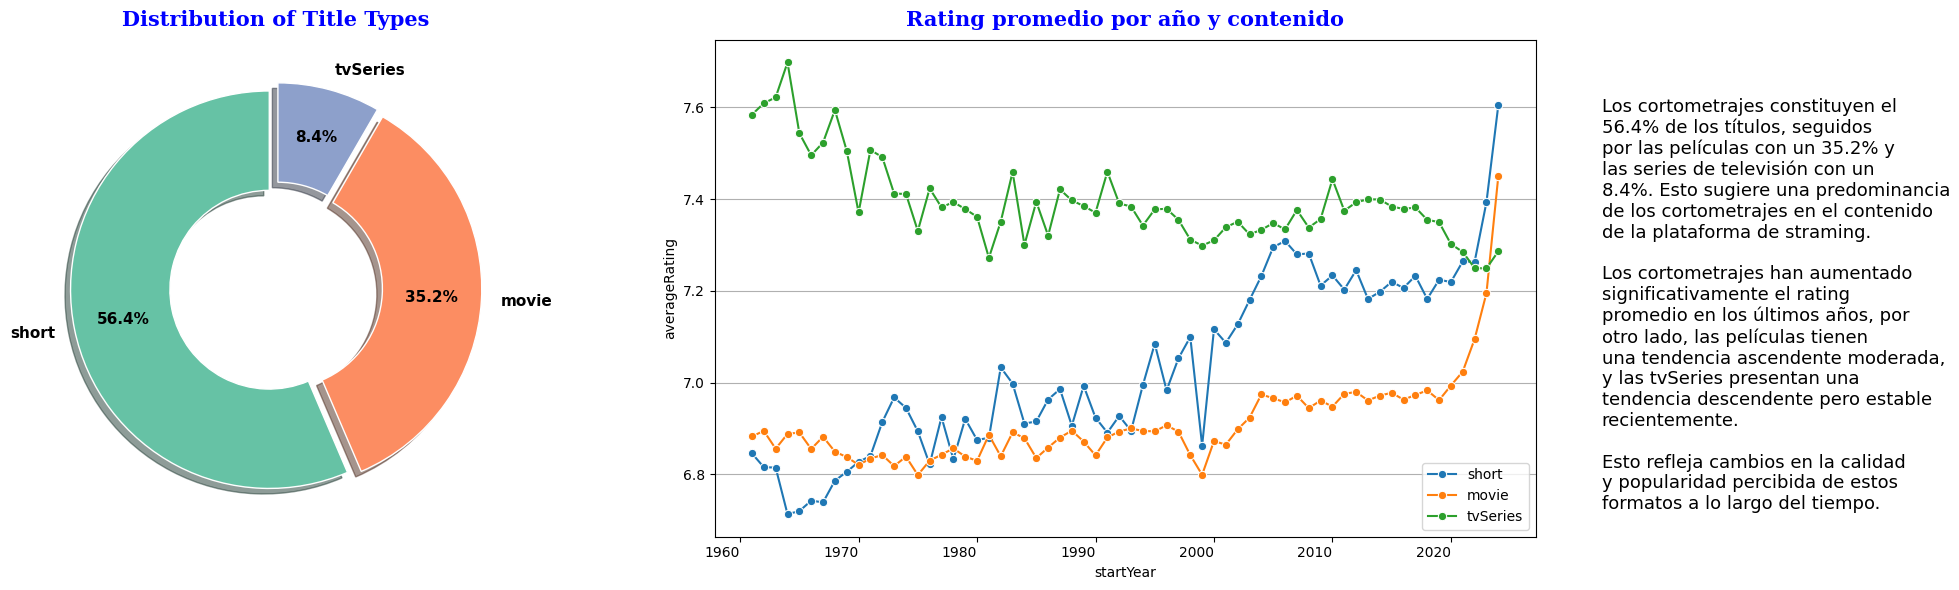

In [89]:
# Crear la figura y los ejes
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(17, 6))

# Gráfico de pie
explode = (0.035, 0.035, 0.035)
ax1.pie(title_type_counts['count'], labels=title_type_counts['titleType'], autopct='%1.1f%%', startangle=90,
       explode=explode, textprops={'fontsize': 11,'weight': 'bold'}, pctdistance=0.75, wedgeprops=dict(width=0.5, edgecolor='w'),
       labeldistance=1.1, colors=plt.cm.Set2.colors, shadow=True)

# Título del gráfico de pie
ax1.set_title('Distribution of Title Types', pad=10,
          fontdict={'fontsize': 15, 'fontfamily':'serif', 'fontstyle':'normal', 'fontweight': 'heavy', 'color': 'blue'})

# Gráfico de líneas
sns.lineplot(data=avg_rating_by_year_short, x='startYear', y='averageRating', marker='o', label='short', ax=ax2)
sns.lineplot(data=avg_rating_by_year_movie, x='startYear', y='averageRating', marker='o', label='movie', ax=ax2)
sns.lineplot(data=avg_rating_by_year_tvSeries, x='startYear', y='averageRating', marker='o', label='tvSeries', ax=ax2)

# Configurar el gráfico de líneas
ax2.set_title('Rating promedio por año y contenido', pad=10,
          fontdict={'fontsize': 15, 'fontfamily':'serif', 'fontstyle':'normal', 'fontweight': 'heavy', 'color': 'blue'})
ax2.set_facecolor('white')

# Ajustar la rotación de las etiquetas del eje x
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=0, ha='right')
ax2.grid(axis='y')

# Establecer el color de fondo del gráfico de pie
fig.patch.set_facecolor('white')

# Añadir texto de conclusión
conclusion_text = '''
Los cortometrajes constituyen el
56.4% de los títulos, seguidos
por las películas con un 35.2% y
las series de televisión con un
8.4%. Esto sugiere una predominancia
de los cortometrajes en el contenido
de la plataforma de straming.

Los cortometrajes han aumentado
significativamente el rating
promedio en los últimos años, por
otro lado, las películas tienen
una tendencia ascendente moderada,
y las tvSeries presentan una
tendencia descendente pero estable
recientemente.

Esto refleja cambios en la calidad
y popularidad percibida de estos
formatos a lo largo del tiempo.'''

plt.figtext(1.03, 0.5, conclusion_text, fontsize=13, color='black', va='center', ha='left')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

## Pregunta 2: ¿Cual es el rating promedio por género?

In [97]:
df_title_basics_modified.head()

tconst titleType           originalTitle  isAdult  startYear  \
0  tt0000001     short              Carmencita        0       1894   
1  tt0000002     short  Le clown et ses chiens        0       1892   
2  tt0000003     short          Pauvre Pierrot        0       1892   
3  tt0000004     short             Un bon bock        0       1892   
4  tt0000005     short        Blacksmith Scene        0       1893   

   runtimeMinutes                    genres  
0               1         Documentary,Short  
1               5           Animation,Short  
2               5  Animation,Comedy,Romance  
3              12           Animation,Short  
4               1              Comedy,Short

In [99]:
df_title_basics_expanded = df_title_basics_modified.assign(genres=df_title_basics_modified['genres'].str.split(',')).explode('genres')
df_title_basics_expanded.head(10)

tconst titleType           originalTitle  isAdult  startYear  \
0  tt0000001     short              Carmencita        0       1894   
0  tt0000001     short              Carmencita        0       1894   
1  tt0000002     short  Le clown et ses chiens        0       1892   
1  tt0000002     short  Le clown et ses chiens        0       1892   
2  tt0000003     short          Pauvre Pierrot        0       1892   
2  tt0000003     short          Pauvre Pierrot        0       1892   
2  tt0000003     short          Pauvre Pierrot        0       1892   
3  tt0000004     short             Un bon bock        0       1892   
3  tt0000004     short             Un bon bock        0       1892   
4  tt0000005     short        Blacksmith Scene        0       1893   

   runtimeMinutes       genres  
0               1  Documentary  
0               1        Short  
1               5    Animation  
1               5        Short  
2               5    Animation  
2               5       Comedy  
2               5      Romance  
3              12    Animation  
3              12        Short  
4               1       Comedy

In [100]:
df_title_ratings_modified.head()

tconst  averageRating  numVotes
2   tt0000003           6.50      2026
4   tt0000005           6.20      2793
9   tt0000010           6.80      7608
11  tt0000012           7.40     12946
13  tt0000014           7.10      5882

In [101]:
# Realizar el merge
df_merged = pd.merge(df_title_basics_expanded, df_title_ratings_modified, on='tconst')
df_merged.head(10)

tconst titleType                        originalTitle  isAdult  \
0  tt0000003     short                       Pauvre Pierrot        0   
1  tt0000003     short                       Pauvre Pierrot        0   
2  tt0000003     short                       Pauvre Pierrot        0   
3  tt0000005     short                     Blacksmith Scene        0   
4  tt0000005     short                     Blacksmith Scene        0   
5  tt0000010     short  La sortie de l'usine Lumière à Lyon        0   
6  tt0000010     short  La sortie de l'usine Lumière à Lyon        0   
7  tt0000012     short     L'arrivée d'un train à La Ciotat        0   
8  tt0000012     short     L'arrivée d'un train à La Ciotat        0   
9  tt0000014     short                    L'arroseur arrosé        0   

   startYear  runtimeMinutes       genres  averageRating  numVotes  
0       1892               5    Animation           6.50      2026  
1       1892               5       Comedy           6.50      2026  
2       1892               5      Romance           6.50      2026  
3       1893               1       Comedy           6.20      2793  
4       1893               1        Short           6.20      2793  
5       1895               1  Documentary           6.80      7608  
6       1895               1        Short           6.80      7608  
7       1896               1  Documentary           7.40     12946  
8       1896               1        Short           7.40     12946  
9       1895               1       Comedy           7.10      5882

In [102]:
df_genre_stats = df_merged.groupby('genres').agg(avg_rating=('averageRating', 'mean'), movie_count=('tconst', 'count')).reset_index()

In [103]:
df_genre_stats.head(10)

genres  avg_rating  movie_count
0       Action        6.95        15099
1        Adult        6.57          835
2    Adventure        7.00        11558
3    Animation        7.00        15809
4    Biography        7.17         6759
5       Comedy        6.95        49050
6        Crime        6.90        15698
7  Documentary        7.34        28765
8        Drama        6.95        84001
9       Family        7.02        11761

<ipython-input-105-bbf323f1220a>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha='right')  # Rotar los nombres del eje x en 45 grados


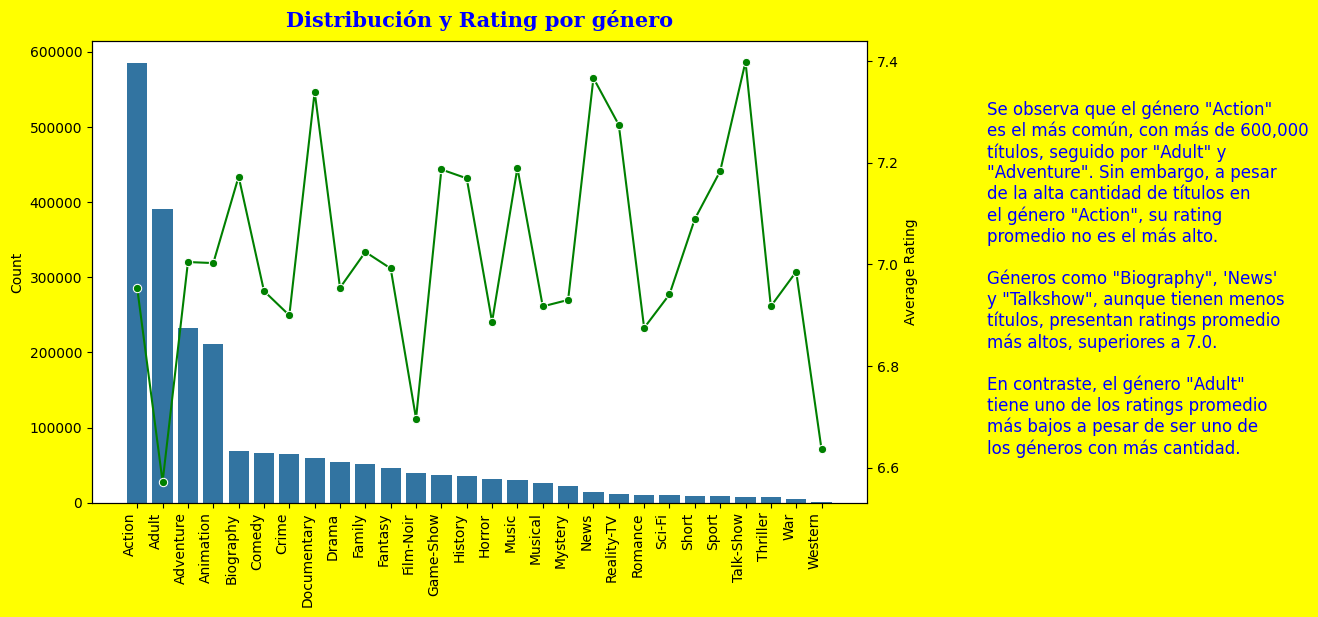

In [105]:
# Crear la figura y los ejes
fig, ax1 = plt.subplots(figsize=(10, 6))

# Grafico de barras
sns.countplot(data=df_title_basics_expanded, x='genres', ax=ax1, order=df_title_basics_expanded['genres'].value_counts().index)
ax1.set_ylabel('Count')

# Crear un segundo eje y graficar el rating promedio
ax2 = ax1.twinx()
sns.lineplot(data=df_genre_stats, x='genres', y='avg_rating', ax=ax2, color='g', marker='o')
ax2.set_ylabel('Average Rating')

# Configurar el gráfico
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha='right')  # Rotar los nombres del eje x en 45 grados
ax1.set_xlabel('')

plt.title('Distribución y Rating por género', pad=10,
          fontdict={'fontsize': 15, 'fontfamily':'serif', 'fontstyle':'normal', 'fontweight': 'heavy', 'color': 'blue'})

# Establecer el color de fondo del gráfico
plt.gcf().set_facecolor('yellow')

# Añadir texto de conclusión
conclusion_text = '''
Se observa que el género "Action"
es el más común, con más de 600,000
títulos, seguido por "Adult" y
"Adventure". Sin embargo, a pesar
de la alta cantidad de títulos en
el género "Action", su rating
promedio no es el más alto.

Géneros como "Biography", 'News'
y "Talkshow", aunque tienen menos
títulos, presentan ratings promedio
más altos, superiores a 7.0.

En contraste, el género "Adult"
tiene uno de los ratings promedio
más bajos a pesar de ser uno de
los géneros con más cantidad.'''

plt.figtext(1.02, 0.5, conclusion_text, fontsize=12, color='blue', va='center', ha='left')

plt.show()

## Pregunta 3: ¿Cuáles son los géneros que proporcionan mayor ROI?

In [106]:
df_tmdb_modified.head()

vote_average  vote_count release_date    revenue  runtime    budget  \
7           8.44       27238   1999-10-15  100853753      139  63000000   
14          8.70       24649   1994-09-23   28341469      142  25000000   
63          7.42       17923   2014-10-22   88761661      101  20000000   
80          7.60       16564   2016-11-10  203388186      116  47000000   
86          8.22       16205   1980-05-23   44781695      144  19000000   

      imdb_id original_language            original_title  popularity  \
7   tt0137523                en                Fight Club       69.50   
14  tt0111161                en  The Shawshank Redemption      122.61   
63  tt2911666                en                 John Wick       55.74   
80  tt2543164                en                   Arrival       47.98   
86  tt0081505                en               The Shining       45.25   

                             genres                      production_countries  \
7                             Drama                  United States of America   
14                     Drama, Crime                  United States of America   
63                 Action, Thriller                  United States of America   
80  Drama, Science Fiction, Mystery   Canada, India, United States of America   
86                 Horror, Thriller  United Kingdom, United States of America   

    roi  
7  0.60  
14 0.13  
63 3.44  
80 3.33  
86 1.36

In [112]:
df_tmdb_expanded = df_tmdb_modified.assign(genre=df_tmdb_modified['genres'].str.split(',')).explode('genre')
df_tmdb_expanded.head(10)

vote_average  vote_count release_date    revenue  runtime    budget  \
7           8.44       27238   1999-10-15  100853753      139  63000000   
14          8.70       24649   1994-09-23   28341469      142  25000000   
14          8.70       24649   1994-09-23   28341469      142  25000000   
63          7.42       17923   2014-10-22   88761661      101  20000000   
63          7.42       17923   2014-10-22   88761661      101  20000000   
80          7.60       16564   2016-11-10  203388186      116  47000000   
80          7.60       16564   2016-11-10  203388186      116  47000000   
80          7.60       16564   2016-11-10  203388186      116  47000000   
86          8.22       16205   1980-05-23   44781695      144  19000000   
86          8.22       16205   1980-05-23   44781695      144  19000000   

      imdb_id original_language            original_title  popularity  \
7   tt0137523                en                Fight Club       69.50   
14  tt0111161                en  The Shawshank Redemption      122.61   
14  tt0111161                en  The Shawshank Redemption      122.61   
63  tt2911666                en                 John Wick       55.74   
63  tt2911666                en                 John Wick       55.74   
80  tt2543164                en                   Arrival       47.98   
80  tt2543164                en                   Arrival       47.98   
80  tt2543164                en                   Arrival       47.98   
86  tt0081505                en               The Shining       45.25   
86  tt0081505                en               The Shining       45.25   

                             genres                      production_countries  \
7                             Drama                  United States of America   
14                     Drama, Crime                  United States of America   
14                     Drama, Crime                  United States of America   
63                 Action, Thriller                  United States of America   
63                 Action, Thriller                  United States of America   
80  Drama, Science Fiction, Mystery   Canada, India, United States of America   
80  Drama, Science Fiction, Mystery   Canada, India, United States of America   
80  Drama, Science Fiction, Mystery   Canada, India, United States of America   
86                 Horror, Thriller  United Kingdom, United States of America   
86                 Horror, Thriller  United Kingdom, United States of America   

    roi             genre  
7  0.60             Drama  
14 0.13             Drama  
14 0.13             Crime  
63 3.44            Action  
63 3.44          Thriller  
80 3.33             Drama  
80 3.33   Science Fiction  
80 3.33           Mystery  
86 1.36            Horror  
86 1.36          Thriller

In [113]:
df_tmdb_expanded.head()

vote_average  vote_count release_date    revenue  runtime    budget  \
7           8.44       27238   1999-10-15  100853753      139  63000000   
14          8.70       24649   1994-09-23   28341469      142  25000000   
14          8.70       24649   1994-09-23   28341469      142  25000000   
63          7.42       17923   2014-10-22   88761661      101  20000000   
63          7.42       17923   2014-10-22   88761661      101  20000000   

      imdb_id original_language            original_title  popularity  \
7   tt0137523                en                Fight Club       69.50   
14  tt0111161                en  The Shawshank Redemption      122.61   
14  tt0111161                en  The Shawshank Redemption      122.61   
63  tt2911666                en                 John Wick       55.74   
63  tt2911666                en                 John Wick       55.74   

              genres      production_countries  roi      genre  
7              Drama  United States of America 0.60      Drama  
14      Drama, Crime  United States of America 0.13      Drama  
14      Drama, Crime  United States of America 0.13      Crime  
63  Action, Thriller  United States of America 3.44     Action  
63  Action, Thriller  United States of America 3.44   Thriller

In [117]:
## Verificando la existencia del género 'TV Movie'
df_tmdb_expanded[df_tmdb_expanded['genre']== 'TV Movie']

vote_average  vote_count release_date   revenue  runtime   budget  \
11939          6.20         195   1996-05-12  42000000       89  5000000   

         imdb_id original_language original_title  popularity  \
11939  tt0116118                en     Doctor Who       11.36   

                                     genres  \
11939  TV Movie, Adventure, Science Fiction   

                                   production_countries  roi     genre  
11939  Canada, United Kingdom, United States of America 7.40  TV Movie

* Observamos que si bien el género 'TV Movie', tiene un rating alto, pero solo figura una vez, por esta razón lo tendremos que descartar de nuestro análisis.

In [120]:
## Eliminando solo este valor, ya que nos genera una distorsión en el análisis
df_tmdb_expanded.drop(df_tmdb_expanded[df_tmdb_expanded['genre']== 'TV Movie'].index, inplace=True)

In [121]:
## Validando que eliminamos correctamente
df_tmdb_expanded[df_tmdb_expanded['genre']== 'TV Movie']

Empty DataFrame
Columns: [vote_average, vote_count, release_date, revenue, runtime, budget, imdb_id, original_language, original_title, popularity, genres, production_countries, roi, genre]
Index: []

In [126]:
## Quitando los espacios en 'genre'
df_tmdb_expanded['genre'] = df_tmdb_expanded['genre'].apply(lambda x: x.replace(' ', ''))

In [127]:
# Calcular el ROI promedio por género
df_genre_roi = df_tmdb_expanded.groupby('genre')['roi'].mean().sort_values(ascending=False).head(10)

In [128]:
df_genre_roi.head()

genre
Documentary   3.20
Music         2.65
Horror        2.56
Comedy        2.42
Mystery       2.40
Name: roi, dtype: float64

<ipython-input-130-8d34e0bc79d3>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_genre_roi.values, y=df_genre_roi.index, palette='viridis', ax=ax)


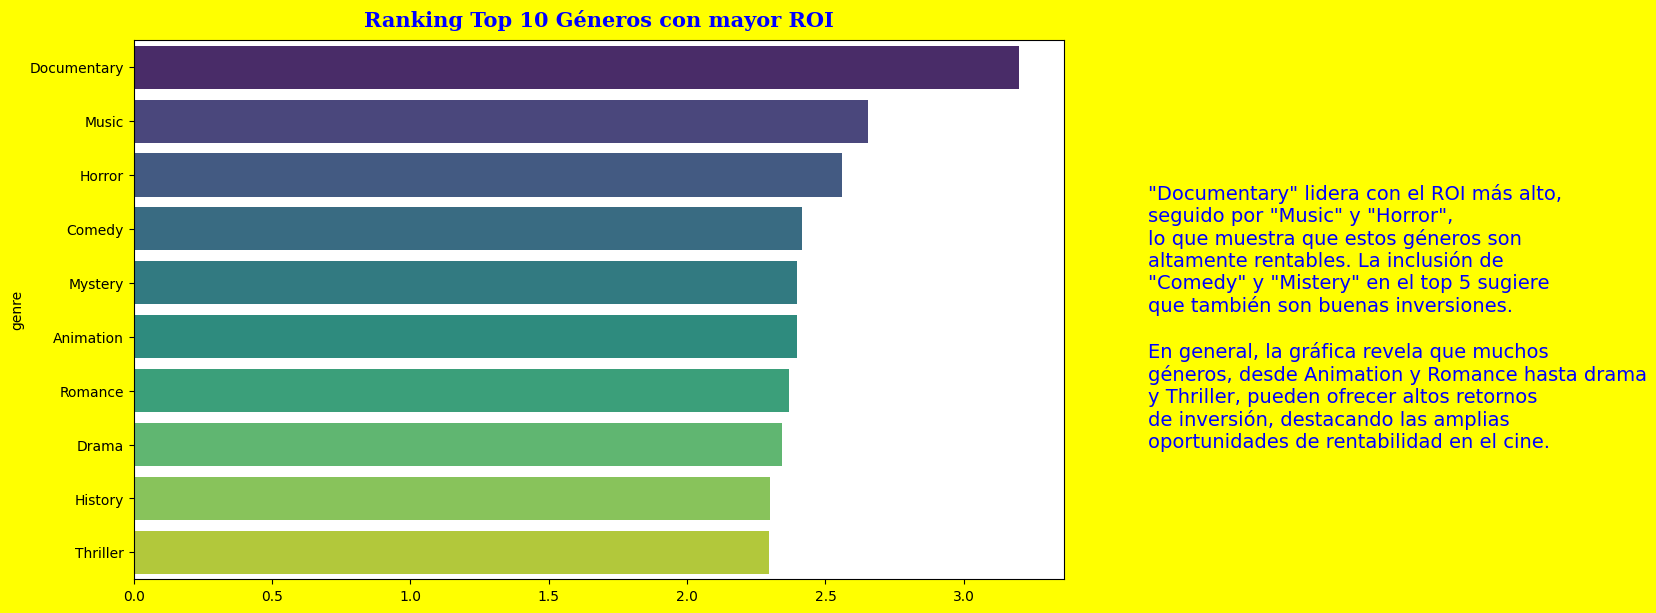

In [130]:
# Crear el gráfico de barras verticales
fig, ax = plt.subplots(figsize=(12, 7))

# Grafico de barras
sns.barplot(x=df_genre_roi.values, y=df_genre_roi.index, palette='viridis', ax=ax)

plt.title('Ranking Top 10 Géneros con mayor ROI', pad=10,
          fontdict={'fontsize': 15, 'fontfamily':'serif', 'fontstyle':'normal', 'fontweight': 'heavy', 'color': 'blue'})

# Establecer el color de fondo del gráfico
plt.gcf().set_facecolor('yellow')

# Añadir texto de conclusión
conclusion_text = '''
"Documentary" lidera con el ROI más alto,
seguido por "Music" y "Horror",
lo que muestra que estos géneros son
altamente rentables. La inclusión de
"Comedy" y "Mistery" en el top 5 sugiere
que también son buenas inversiones.

En general, la gráfica revela que muchos
géneros, desde Animation y Romance hasta drama
y Thriller, pueden ofrecer altos retornos
de inversión, destacando las amplias
oportunidades de rentabilidad en el cine.'''

plt.figtext(0.97, 0.5, conclusion_text, fontsize=14, color='blue', va='center', ha='left')

plt.show()



## Pregunta 4: ¿Cuáles son los géneros con mayor ROI que también son populares?

In [131]:
df_tmdb_expanded.head()

vote_average  vote_count release_date    revenue  runtime    budget  \
7           8.44       27238   1999-10-15  100853753      139  63000000   
14          8.70       24649   1994-09-23   28341469      142  25000000   
14          8.70       24649   1994-09-23   28341469      142  25000000   
63          7.42       17923   2014-10-22   88761661      101  20000000   
63          7.42       17923   2014-10-22   88761661      101  20000000   

      imdb_id original_language            original_title  popularity  \
7   tt0137523                en                Fight Club       69.50   
14  tt0111161                en  The Shawshank Redemption      122.61   
14  tt0111161                en  The Shawshank Redemption      122.61   
63  tt2911666                en                 John Wick       55.74   
63  tt2911666                en                 John Wick       55.74   

              genres      production_countries  roi     genre  
7              Drama  United States of America 0.60     Drama  
14      Drama, Crime  United States of America 0.13     Drama  
14      Drama, Crime  United States of America 0.13     Crime  
63  Action, Thriller  United States of America 3.44    Action  
63  Action, Thriller  United States of America 3.44  Thriller

In [136]:
# Calcular la popularidad y ROI promedio por género
# df_mix = df_tmdb_expanded.groupby('genre')['roi'].mean().sort_values(ascending=False).head(10)

df_mix = df_tmdb_expanded.groupby('genre').agg(avg_roi=('roi', 'mean'), avg_popul=('popularity', 'mean')).reset_index().sort_values(by='avg_roi', ascending=False)
df_mix.head(15)

genre  avg_roi  avg_popul
5      Documentary     3.20       4.68
11           Music     2.65      10.99
10          Horror     2.56      26.18
3           Comedy     2.42      14.69
12         Mystery     2.40      23.67
2        Animation     2.40      28.47
13         Romance     2.37      13.53
6            Drama     2.34      15.39
9          History     2.30      16.89
16        Thriller     2.30      22.92
17             War     2.27      19.44
7           Family     2.23      18.86
1        Adventure     2.21      22.67
14  ScienceFiction     2.13      20.98
4            Crime     2.13      19.76

<ipython-input-148-e0fcaa11f4e9>:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha='right')


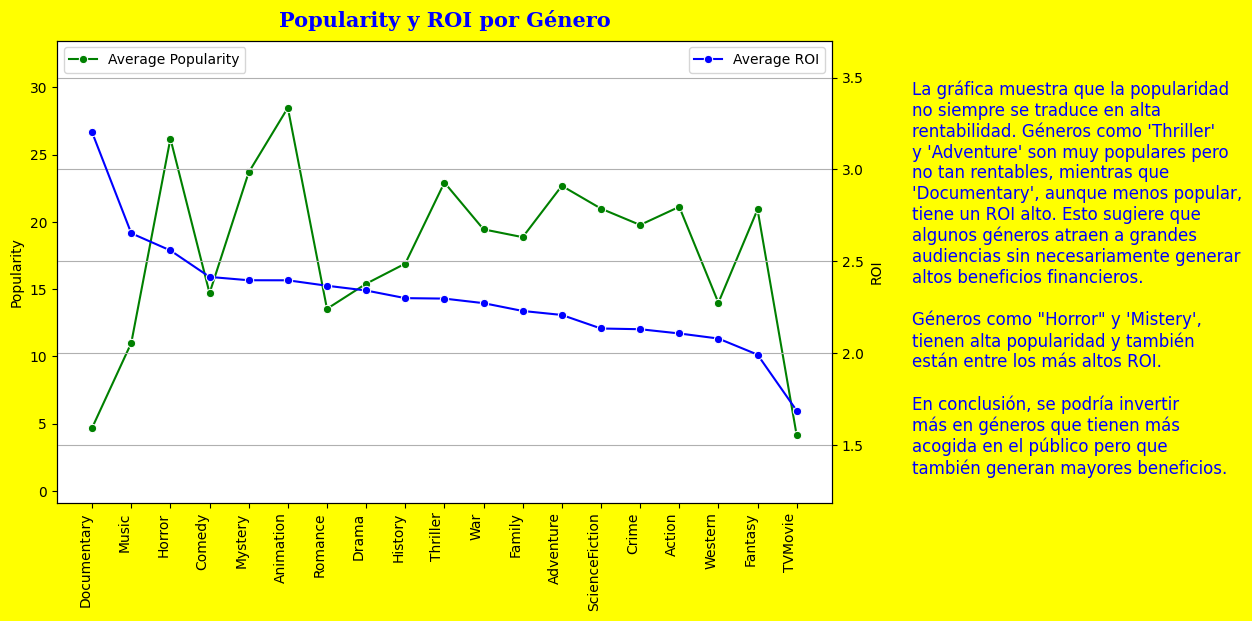

In [148]:
# Crear la figura y los ejes
fig, ax1 = plt.subplots(figsize=(10, 6))

# Grafico de líneas popularity promedio por género
sns.lineplot(data=df_mix, x='genre', y='avg_popul', ax=ax1, color='g', marker='o', label='Average Popularity')
ax1.set_ylabel('Popularity')
ax1.set_ylim(df_mix['avg_popul'].min() - 5, df_mix['avg_popul'].max() + 5)
ax1.legend(loc='upper left')

# Crear un segundo eje y graficar el roi promedio por género
ax2 = ax1.twinx()
sns.lineplot(data=df_mix, x='genre', y='avg_roi', ax=ax2, color='b', marker='o', label='Average ROI')
ax2.set_ylabel('ROI')
ax2.set_ylim(df_mix['avg_roi'].min() - 0.5, df_mix['avg_roi'].max() + 0.5)

# Configurar el gráfico
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha='right')
ax1.set_xlabel('')
ax2.legend(loc='upper right')

plt.title('Popularity y ROI por Género', pad=10,
          fontdict={'fontsize': 15, 'fontfamily': 'serif', 'fontstyle': 'normal', 'fontweight': 'heavy', 'color': 'blue'})

# Establecer el color de fondo del gráfico
plt.gcf().set_facecolor('yellow')

# Añadir texto de conclusión
conclusion_text = '''
La gráfica muestra que la popularidad
no siempre se traduce en alta
rentabilidad. Géneros como 'Thriller'
y 'Adventure' son muy populares pero
no tan rentables, mientras que
'Documentary', aunque menos popular,
tiene un ROI alto. Esto sugiere que
algunos géneros atraen a grandes
audiencias sin necesariamente generar
altos beneficios financieros.

Géneros como "Horror" y 'Mistery',
tienen alta popularidad y también
están entre los más altos ROI.

En conclusión, se podría invertir
más en géneros que tienen más
acogida en el público pero que
también generan mayores beneficios.'''

plt.figtext(0.98, 0.5, conclusion_text, fontsize=12, color='blue', va='center', ha='left')

plt.grid()
plt.show()

## Pregunta 5: ¿Cuáles son los países con mayor producción de contenido?

In [194]:
df_tmdb_modified.head()

vote_average  vote_count release_date    revenue  runtime    budget  \
7           8.44       27238   1999-10-15  100853753      139  63000000   
14          8.70       24649   1994-09-23   28341469      142  25000000   
63          7.42       17923   2014-10-22   88761661      101  20000000   
80          7.60       16564   2016-11-10  203388186      116  47000000   
86          8.22       16205   1980-05-23   44781695      144  19000000   

      imdb_id original_language            original_title  popularity  \
7   tt0137523                en                Fight Club       69.50   
14  tt0111161                en  The Shawshank Redemption      122.61   
63  tt2911666                en                 John Wick       55.74   
80  tt2543164                en                   Arrival       47.98   
86  tt0081505                en               The Shining       45.25   

                             genres                      production_countries  \
7                             Drama                  United States of America   
14                     Drama, Crime                  United States of America   
63                 Action, Thriller                  United States of America   
80  Drama, Science Fiction, Mystery   Canada, India, United States of America   
86                 Horror, Thriller  United Kingdom, United States of America   

    roi  
7  0.60  
14 0.13  
63 3.44  
80 3.33  
86 1.36

In [195]:
df_tmdb_exploded_countries = df_tmdb_modified.assign(production_countries=df_tmdb_modified['production_countries'].str.split(',')).explode('production_countries').copy()
df_tmdb_exploded_countries['production_countries'] = df_tmdb_exploded_countries['production_countries'].str.strip()
df_tmdb_exploded_countries.head()

vote_average  vote_count release_date    revenue  runtime    budget  \
7           8.44       27238   1999-10-15  100853753      139  63000000   
14          8.70       24649   1994-09-23   28341469      142  25000000   
63          7.42       17923   2014-10-22   88761661      101  20000000   
80          7.60       16564   2016-11-10  203388186      116  47000000   
80          7.60       16564   2016-11-10  203388186      116  47000000   

      imdb_id original_language            original_title  popularity  \
7   tt0137523                en                Fight Club       69.50   
14  tt0111161                en  The Shawshank Redemption      122.61   
63  tt2911666                en                 John Wick       55.74   
80  tt2543164                en                   Arrival       47.98   
80  tt2543164                en                   Arrival       47.98   

                             genres      production_countries  roi  
7                             Drama  United States of America 0.60  
14                     Drama, Crime  United States of America 0.13  
63                 Action, Thriller  United States of America 3.44  
80  Drama, Science Fiction, Mystery                    Canada 3.33  
80  Drama, Science Fiction, Mystery                     India 3.33

In [196]:
# Creamos un DataFrame con los datos necesarios para el gráfico
df_plot = df_tmdb_exploded_countries.groupby('production_countries').agg(avg_roi=('roi', 'mean'), count=('production_countries', 'count'))
df_plot.head()

avg_roi  count
production_countries                
Algeria                  0.39      2
Argentina                2.19     23
Aruba                    0.26      1
Australia                2.07     75
Austria                  1.67     10

In [197]:
# Ordenamos el DataFrame por 'count' en orden descendente
df_plot = df_plot.sort_values(by='count', ascending=False)
df_plot_geo = df_plot.copy()
df_plot = df_plot.head(10)
df_plot

avg_roi  count
production_countries                    
United States of America     2.38   3549
United Kingdom               2.34    534
India                        2.41    484
France                       1.97    353
Germany                      1.93    216
Canada                       2.24    209
Japan                        2.37    125
Russia                       2.21    103
Spain                        2.39     91
Italy                        1.73     90

In [198]:

# Asignamos posiciones fijas en una cuadrícula
num_countries = len(df_plot)
grid_size = int(np.ceil(np.sqrt(num_countries)))
df_plot['x'] = np.tile(np.arange(grid_size), grid_size)[:num_countries]
df_plot['y'] = np.repeat(np.arange(grid_size), grid_size)[:num_countries]


import plotly.express as px

# Creamos el gráfico de burbujas usando Plotly
fig = px.scatter(df_plot, x='x', y='y',
                 size='count', color='avg_roi',
                 text=df_plot.index,
                 color_continuous_scale='Blues',
                 size_max=110)

# Mostramos el gráfico
fig.show()

In [199]:
# Asignamos posiciones fijas en una cuadrícula
num_countries = len(df_plot)
grid_size = int(np.ceil(np.sqrt(num_countries)))
df_plot['x'] = np.tile(np.arange(grid_size), grid_size)[:num_countries]
df_plot['y'] = np.repeat(np.arange(grid_size), grid_size)[:num_countries]

# Crear el gráfico de burbujas usando Plotly
fig = px.scatter(df_plot, x='x', y='y',
                 size='count', color='avg_roi',
                 text=df_plot.index,
                 color_continuous_scale='Blues',
                 size_max=100,
                 labels={'x': '', 'y': ''},
                 title='Países con mayor producción de contenido')

# Ajustes adicionales
fig.update_traces(textposition='top center')
fig.update_layout(
    xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
    yaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
    plot_bgcolor='white'
)

# Mejorar visibilidad de los colores
fig.update_traces(marker=dict(line=dict(width=2, color='DarkSlateGrey')))

# Mostrar el gráfico
fig.show()

In [200]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

# Cargar el archivo de geometría de los países
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Combinar datos con geometría
world = world.merge(df_plot_geo, left_on='name', right_on='production_countries')
world

<ipython-input-200-9226ac1845fd>:6: FutureWarning:

The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.



pop_est      continent                      name iso_a3  gdp_md_est  \
0    37589262.00  North America                    Canada    CAN     1736425   
1   328239523.00  North America  United States of America    USA    21433226   
2    18513930.00           Asia                Kazakhstan    KAZ      181665   
3   270625568.00           Asia                 Indonesia    IDN     1119190   
4    44938712.00  South America                 Argentina    ARG      445445   
5    18952038.00  South America                     Chile    CHL      282318   
6    52573973.00         Africa                     Kenya    KEN       95503   
7   144373535.00         Europe                    Russia    RUS     1699876   
8      389482.00  North America                   Bahamas    BHS       13578   
9     5347896.00         Europe                    Norway    NOR      403336   
10   58558270.00         Africa              South Africa    ZAF      351431   
11  127575529.00  North America                    Mexico    MEX     1268870   
12    3461734.00  South America                   Uruguay    URY       56045   
13  211049527.00  South America                    Brazil    BRA     1839758   
14   11513100.00  South America                   Bolivia    BOL       40895   
15   32510453.00  South America                      Peru    PER      226848   
16   50339443.00  South America                  Colombia    COL      323615   
17    9746117.00  North America                  Honduras    HND       25095   
18   28515829.00  South America                 Venezuela    VEN      482359   
19   67059887.00         Europe                    France    FRA     2715518   
20   17373662.00  South America                   Ecuador    ECU      107435   
21    3193694.00  North America               Puerto Rico    PRI      104988   
22  200963599.00         Africa                   Nigeria    NGA      448120   
23   30417856.00         Africa                     Ghana    GHA       66983   
24   20321378.00         Africa              Burkina Faso    BFA       15990   
25    9053300.00           Asia                    Israel    ISR      394652   
26    6855713.00           Asia                   Lebanon    LBN       51991   
27   43053054.00         Africa                   Algeria    DZA      171091   
28    9770529.00           Asia      United Arab Emirates    ARE      421142   
29    2832067.00           Asia                     Qatar    QAT      175837   
30    4207083.00           Asia                    Kuwait    KWT      134628   
31   39309783.00           Asia                      Iraq    IRQ      234094   
32   16486542.00           Asia                  Cambodia    KHM       27089   
33   69625582.00           Asia                  Thailand    THA      543548   
34   96462106.00           Asia                   Vietnam    VNM      261921   
35   51709098.00           Asia               South Korea    KOR     1646739   
36 1366417754.00           Asia                     India    IND     2868929   
37  163046161.00           Asia                Bangladesh    BGD      302571   
38   28608710.00           Asia                     Nepal    NPL       30641   
39  216565318.00           Asia                  Pakistan    PAK      278221   
40   82913906.00           Asia                      Iran    IRN      453996   
41   10285453.00         Europe                    Sweden    SWE      530883   
42   44385155.00         Europe                   Ukraine    UKR      153781   
43   37970874.00         Europe                    Poland    POL      595858   
44    8877067.00         Europe                   Austria    AUT      445075   
45    9769949.00         Europe                   Hungary    HUN      163469   
46   19356544.00         Europe                   Romania    ROU      250077   
47   83132799.00         Europe                   Germany    DEU     3861123   
48    6975761.00         Europe                  Bulgaria    BGR       68558   
49   1071

In [201]:
world.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   pop_est     80 non-null     float64 
 1   continent   80 non-null     object  
 2   name        80 non-null     object  
 3   iso_a3      80 non-null     object  
 4   gdp_md_est  80 non-null     int64   
 5   geometry    80 non-null     geometry
 6   avg_roi     80 non-null     float64 
 7   count       80 non-null     int64   
dtypes: float64(2), geometry(1), int64(2), object(3)
memory usage: 5.1+ KB


In [206]:
import plotly.express as px

# Crear un DataFrame GeoPandas a partir de tu DataFrame existente
gdf = gpd.GeoDataFrame(world, geometry='geometry')

# Crear el gráfico interactivo con Plotly Express
fig = px.choropleth_mapbox(
    gdf,
    geojson=gdf.geometry.geometry.__geo_interface__,
    locations=gdf.index,
    color='count',
    hover_name='name',
    # hover_data={'count': True, 'avg_roi': True}
    mapbox_style="carto-positron",
    center={"lat": gdf.geometry.centroid.y.mean(), "lon": gdf.geometry.centroid.x.mean()},
    zoom=1.5,
    title='ROI y Conteo de producción por país',
    labels={'count': 'Conteo de Películas'}
)

# Configurar la presentación del gráfico
fig.update_layout(
    title='ROI y Conteo de producción por país',
    margin={"r":0,"t":0,"l":0,"b":0}
)

# Mostrar el gráfico interactivo
fig.show()

<ipython-input-206-055f49643be2>:15: UserWarning:

Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.




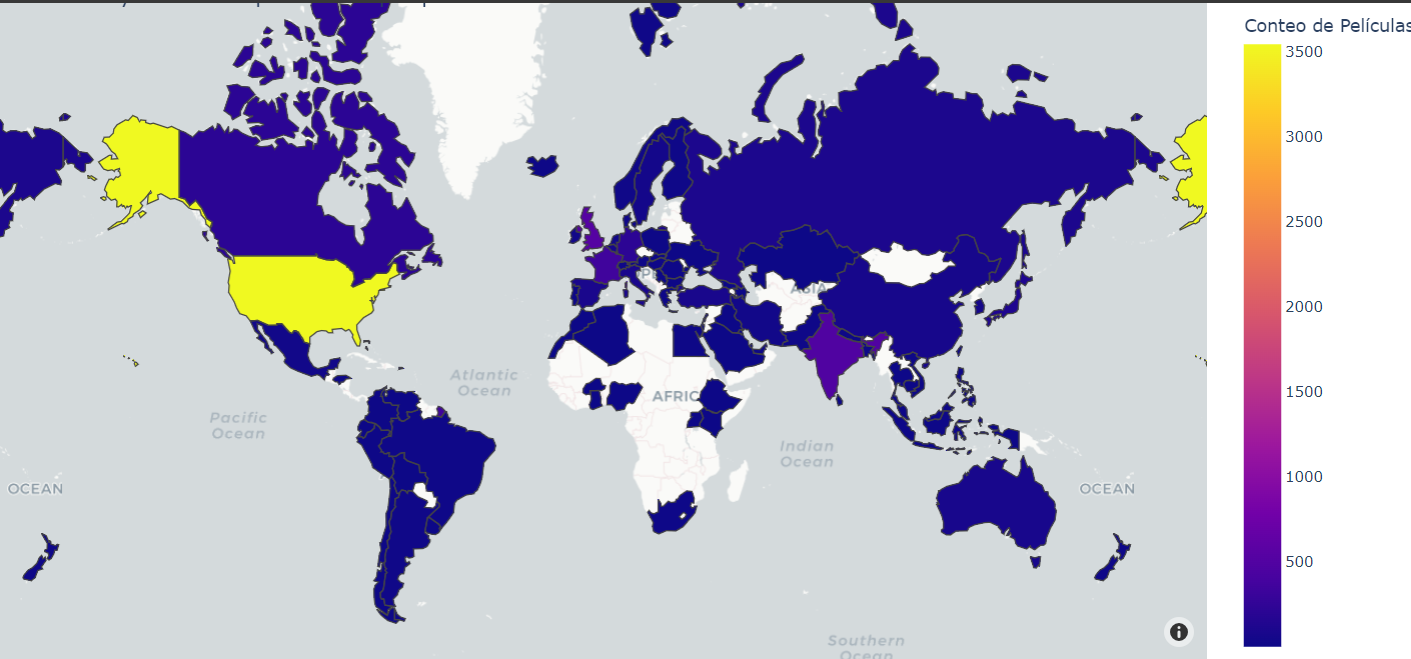

In [207]:
# Guardar el gráfico como un archivo HTML
fig.write_html("conteo_peliculas_paises.html")

<ipython-input-204-6dedd35dee60>:7: FutureWarning:

The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.



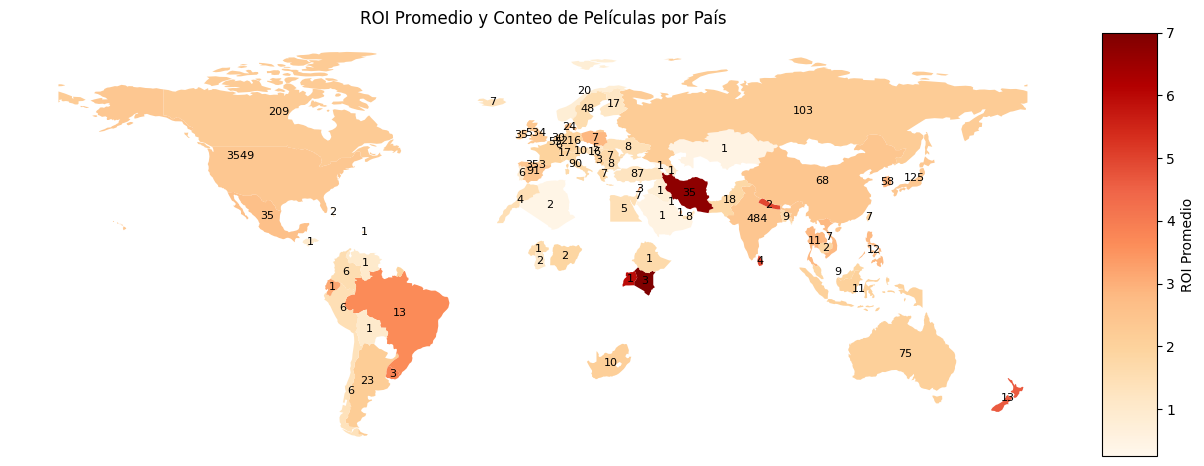

In [204]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Cargar el archivo de geometría de los países
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# # Filtrar los países relevantes
# countries = ['United States of America', 'United Kingdom', 'India', 'France', 'Germany',
#              'Canada', 'Japan', 'Russia', 'Spain', 'Italy']
# world = world[world.name.isin(countries)]

# Combinar datos con geometría
world = world.merge(df_plot_geo, left_on='name', right_on='production_countries')

# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(15, 20))

# Dividir los ejes para colocar la barra de color al lado
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)

# Graficar ROI promedio como un mapa coroplético
world.plot(column='avg_roi', ax=ax, legend=True, legend_kwds={'label': "ROI Promedio", 'orientation': "vertical"}, cmap='OrRd', cax=cax)

# Anotar el conteo de películas en cada país
for idx, row in world.iterrows():
    ax.text(row.geometry.centroid.x, row.geometry.centroid.y, s=row['count'],
            horizontalalignment='center', verticalalignment='center', fontsize=8, color='black')

ax.set_title('ROI Promedio y Conteo de Películas por País')
ax.set_axis_off()

plt.show()

# CONCLUSIONES Y RECOMENDACIONES:

* Basado en el análisis de géneros y tipos de contenido en términos de popularidad, rentabilidad y aceptación por parte del público, se concluye que la alta popularidad no siempre se traduce en altos beneficios financieros. Géneros como 'Thriller' y 'Adventure' son muy populares pero no tan rentables, mientras que 'Documentary', menos popular, muestra un alto retorno de inversión. Esto subraya la importancia de equilibrar la popularidad con la rentabilidad al elegir en qué géneros invertir.

* Por otro lado, géneros como 'Horror' y 'Mystery' destacan por ser tanto populares como altamente rentables, posicionándolos como inversiones atractivas. Además, géneros como 'Biography', 'News' y 'Talkshow', aunque menos frecuentes, disfrutan de ratings promedio más altos, lo que sugiere una recepción favorable por parte del público. Invertir en estos géneros puede fortalecer la reputación de la plataforma y mejorar la retención de audiencia.

* En términos de contenido, los cortometrajes dominan significativamente (56.4%), seguidos por películas (35.2%) y series de televisión (8.4%). Esta predominancia de cortometrajes sugiere oportunidades para diversificar y expandir la biblioteca de contenido, adaptándose a las preferencias cambiantes del público.

* Además, se observan tendencias positivas en la calidad del contenido a lo largo del tiempo, con un aumento en el rating promedio de los cortometrajes y una tendencia creciente moderada en las películas. Las series de televisión, aunque presentan una tendencia a la baja, siguen siendo una parte importante del panorama de contenido.

* Para mejorar el rendimiento de la plataforma, se recomienda mantener una oferta diversa que combine géneros populares con aquellos que ofrecen altos retornos de inversión. Priorizar la calidad sobre la cantidad en la producción de contenido y adaptar las estrategias según las tendencias emergentes del mercado son pasos clave para asegurar una respuesta positiva y continua de la audiencia.